In [1]:
# INIZIALIZZAZIONE
#####

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
from IPython.display import display
from joblib import dump, load
from prettytable import PrettyTable
import tabulate
from tqdm import tqdm_notebook
from scipy.optimize import curve_fit

import os
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 175)

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection  import cross_val_predict, cross_val_score

# Functions
import importlib
import functions
importlib.reload(functions)
from functions import *

seed = get_seed() # 42


In [2]:
# LETTURA DATAFRAME
#####

dataset_csv = read_dataset("datasets/dataset_vimercate.csv")



* Eliminazione record
	- record con diagnosi_descr = Insufficienza respiratoria cronica
	- dimensione dataset: 1067
	- record eliminati: 6
	- dimensione nuovo dataset: 1061

* Eliminazione record
	- record con diagnosi_descr = Insufficienza respiratoria acuta e cronica
	- dimensione dataset: 1061
	- record eliminati: 61
	- dimensione nuovo dataset: 1000

* Eliminazione record PaO2/FiO2 Ratio nullo
	- record con PaO2/FiO2 Ratio = NaN
	- record con CPAP_OK == 1
	- dimensione dataset: 1000
	- record eliminati: 280
	- dimensione nuovo dataset: 720

* Numero di pazienti individuali: 716


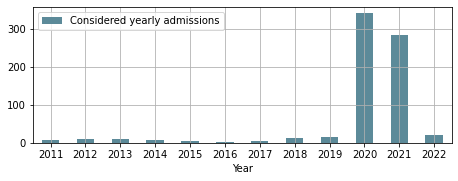


* Drop features
	- numero features dataset: 140
	- numero features eliminate: 88
	- numero features rimanenti: 52
	- features eliminate: ['cod_individuale', 'cod_ospedale', 'num_pratica', 'data_nascita', 'data_ricovero', 'regime_ricovero', 'reparto_ricovero', 'provenienza', 'tipo_ricovero', 'folder_id', 'Cost', 'data_trasf1', 'reparto_trasf1', 'data_trasf2', 'gg_reparto_trasf1', 'reparto_trasf2', 'gg_reparto_trasf2', 'data_trasf3', 'gg_reparto_trasf3', 'reparto_trasf3', 'data_dimissione', 'diagnosi_princ', 'flag_diagnosi_princ', 'diagnosi_sec1', 'flag_diagnosi1', 'diagnosi_sec2', 'flag_diagnosi2', 'diagnosi_sec3', 'flag_diagnosi3', 'diagnosi_sec4', 'flag_diagnosi4', 'diagnosi_sec5', 'flag_diagnosi5', 'diagnosi_descr', 'diagnosi_sec1_descr', 'diagnosi_sec2_descr', 'diagnosi_sec3_descr', 'diagnosi_sec4_descr', 'diagnosi_sec5_descr', 'drg_descr', 'mse_description', 'data_int_princ', 'cod_int_princ', 'data_int_1', 'cod_int_1', 'data_int_2', 'cod_int_2', 'data_int_3', 'cod_int_3', 'data_in

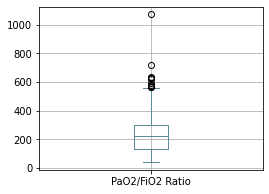


* Ricerca e sostituzione outliers (valore >  97.5 percentile || valore <  2.5 percentile)
	- outliers report: ['Age: 20 positivi > 87.00, 19 negativi < 41.00', 'H-CPAP days: 19 positivi > 24.00, 13 negativi < 1.00', 'Potassium: 21 positivi > 5.32, 21 negativi < 3.42', 'Sodium: 20 positivi > 152.00, 15 negativi < 133.00', 'Creatinine: 21 positivi > 3.40, 20 negativi < 0.49', 'eGFR: 0 positivi > 60.00, 21 negativi < 15.17', 'MCHC: 21 positivi > 35.01, 20 negativi < 29.70', 'Red Blood Cells: 21 positivi > 5.50, 21 negativi < 2.91', 'Hematocrit: 21 positivi > 47.61, 21 negativi < 27.72', 'Platelet Count: 21 positivi > 540.24, 21 negativi < 87.16', 'MCH: 20 positivi > 33.50, 19 negativi < 23.60', 'White Blood Cells: 17 positivi > 25.00, 21 negativi < 3.94', 'Hemoglobin: 21 positivi > 15.80, 19 negativi < 1.00', 'MCV: 20 positivi > 104.10, 21 negativi < 77.46', 'C-Reactive Protein: 21 positivi > 243.47, 21 negativi < 0.76', 'RBC Width (RDW): 21 positivi > 18.63, 17 negativi < 11.70', 'ALT: 

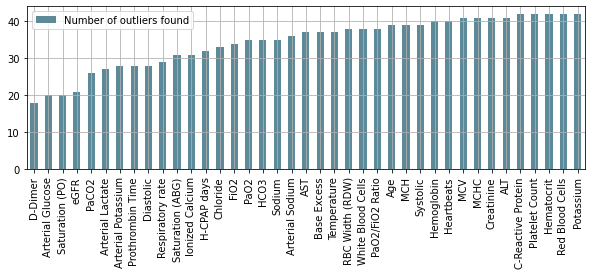

	- 1343 outliers trovati, 696 positivi, 647 negativi


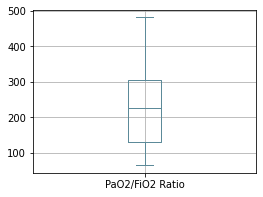

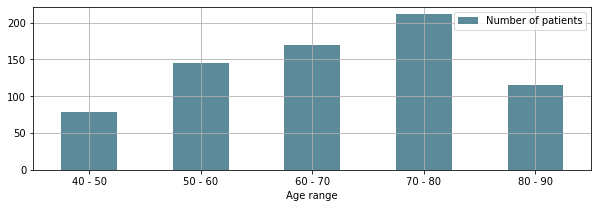


* Conto missing values e scarto features con piu' del 20.0 % di missing values
	- numero features eliminate: 13
	- numero features mantenute: 38
	- features eliminate: ['Chloride: 0.24', 'Prothrombin Time: 0.29', 'Hypertension: 0.47', 'Hearth Diseases: 0.47', 'Lung Diseases: 0.47', 'Past Neoplasms: 0.47', 'Kidney Diseases: 0.47', 'Celiac Diseases: 0.47', 'Vascular Diseases: 0.47', 'Previous Hospitalization: 0.47', 'Previous Surgery: 0.47', 'Smoker: 0.47', 'Diabetes: 0.47']
	- features mantenute: ['Sex: 0.00', 'Age: 0.00', 'H-CPAP days: 0.00', 'Potassium: 0.03', 'Sodium: 0.03', 'Creatinine: 0.03', 'eGFR: 0.03', 'MCHC: 0.03', 'Red Blood Cells: 0.03', 'Hematocrit: 0.03', 'Platelet Count: 0.03', 'MCH: 0.03', 'White Blood Cells: 0.03', 'Hemoglobin: 0.03', 'MCV: 0.03', 'C-Reactive Protein: 0.04', 'RBC Width (RDW): 0.03', 'ALT: 0.06', 'AST: 0.07', 'D-Dimer: 0.17', 'PaO2: 0.13', 'Arterial Glucose: 0.09', 'Arterial Potassium: 0.13', 'PaCO2: 0.13', 'Arterial Sodium: 0.13', 'Saturation (ABG): 0.

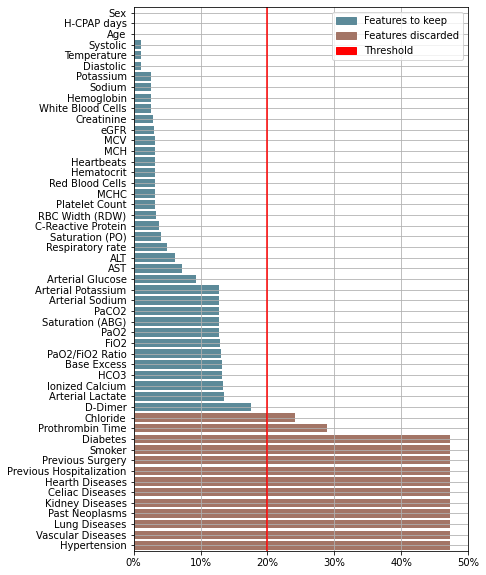


* Randomizzazione features e labels

* Split in training e testing set
	- record in testing set: 504 features, 504 labels
	- record in training set: 216 features, 216 labels

* Randomizzazione training set e testing set

* Ricerca di colonne booleane
	- features booleane: ['Sex']

* Imputazione valori mancanti

* Imputazione features FiO2, pO2, RAPPORTO pO2/FiO2
	- anomalie trovate e corrette sui dati: 0

* Conversione dataframe in float
	- numero colonne convertite in float: 38

* Conversione dataframe in float
	- numero colonne convertite in float: 38

* Conversione dataframe in float
	- numero colonne convertite in float: 540


In [3]:
# DATA CLEANING
#####

# Functions
import importlib
import functions
importlib.reload(functions)
from functions import *

dataset = dataset_csv

# RENAMING DI ALCUNE DIAGNOSI
dataset = dataset.replace(['Insufficienza respiratoria acuta'], 'AHRF or ARDS')
dataset = dataset.replace(['SINDROME DA DISTRESS RESPIRATORIO (ARDS) IN COVID-19, VIRUS IDENTIFICATO'], 'Covid-19 ARDS')
dataset = dataset.replace(['POLMONITE IN COVID-19, VIRUS IDENTIFICATO'], 'Covid-19 Pneumonia')
dataset = dataset.replace(['Polmonite. agente non specificato'], 'Pneumonia')
dataset = dataset.replace(['Broncopolmonite. agente non specificato'], 'Bronchopneumonia')
dataset = dataset.replace(['Diagnosi Sec 1 non presente'], 'Unknown secondary diagnosis')
dataset = dataset.replace(['Diagnosi Sec 2 non presente'], 'Unknown third diagnosis')
dataset = dataset.replace(['Embolia polmonare e infarto polmonare iatrogeni'], 'Pulmonary embolism and lung infarction')
dataset = dataset.replace(['Insufficienza cardiaca non specificata (scompenso cardiaco non specificato)'], 'Congestive heart failure')
dataset = dataset.replace(['Insufficienza cardiaca congestizia non specificata (scompenso cardiaco congestizio non specificato)'], 'Congestive heart failure')
dataset = dataset.replace(['Diabete mellito. tipo II o non specificato. non definito se scompensato. senza menzione di complicazioni'], 'Diabetes')
dataset = dataset.replace(['Cardiopatia ischemica cronica non specificata'], 'Ischemic heart disease')
dataset = dataset.replace(['Polmonite pneumococcica (polmonite da Streptococco pneumoniae)'], 'Pneumonia')
dataset = dataset.replace(['Edema polmonare acuto. non specificato'], 'Pulmonary edema')
dataset = dataset.replace(['Polmonite pneumococcica (polmonite da Streptococco pneumoniae)'], 'Pneumonia')
dataset = dataset.replace(['Bronchite cronica ostruttiva. con esacerbazione (acuta)'], 'Chronic obstructive pulmonary disease')
dataset = dataset.replace(['Bronchite cronica ostruttiva con bronchite acuta'], 'Chronic obstructive pulmonary disease')
dataset = dataset.replace(['Polmonite da Mycoplasma Pneumoniae'], 'Pneumonia')
dataset = dataset.replace(['Insufficienza del cuore sinistro (scompenso cardiaco sinistro)'], 'Congestive heart failure')
dataset = dataset.replace(['Ipertensione essenziale benigna'], 'Hypertension')
dataset = dataset.replace(['Ipertensione essenziale non specificata'], 'Hypertension')
dataset = dataset.replace(['Obesita\' grave'], 'Obesity')
dataset = dataset.replace(['Obesita\' non specificata'], 'Obesity')

# RENAME FEATURES
dataset = dataset.rename(
	columns={
		"eta": "Age",
		"sesso": "Sex",
		"deceduto": "Death",
		"importo_netto": "Cost",
		"gg_terapia_CPAP": "H-CPAP days",
		"gg_da_ric_a_CPAP": "Admission to CPAP days",
		"gg_da_CPAP_a_dim": "H-CPAP to discharge days",
		"temperatura": "Temperature",
		"bpm": "Heartbeats",
		"atti_min": "Respiratory rate",
		"perc_O2": "Saturation (PO)",
		"diastolica": "Diastolic",
		"sistolica": "Systolic",
		"mpm_arthypertensionflag": "Hypertension",
		"mpm_cardiodeseaseflag": "Hearth Diseases",
		"mpm_lungdeseaseflag": "Lung Diseases",
		"mpm_neoplasieflag": "Past Neoplasms",
		"mpm_kidneydeseaseflag": "Kidney Diseases",
		"mpm_celiacdeseaseflag": "Celiac Diseases",
		"mpm_circdeseaseflag": "Vascular Diseases",
		"mpm_prevhospitalizeflag": "Previous Hospitalization",
		"mpm_prevsurginterventflag": "Previous Surgery",
		"fumatore": "Smoker",
		"diabetico": "Diabetes",
		"EMOGLOBINA": "Hemoglobin",
		"EMATOCRITO": "Hematocrit",
		"ERITROCITI": "Red Blood Cells",
		"AMPIEZZA DISTRIB. ERITROC. IN CV": "RBC Width (RDW)",
		"PIASTRINE": "Platelet Count",
		"LEUCOCITI": "White Blood Cells",
		"VOLUME CORP. MEDIO (MCV)": "MCV",
		"EMOGLOBINA CORP. MEDIA (MCH)": "MCH",
		"CONC.Hb CORP. MEDIA (MCHC)": "MCHC",
		"P--P.T.": "Prothrombin Time",
		"D DIMERO": "D-Dimer",
		"P--CREATININA": "Creatinine",
		"FILTRAZIONE GLOMERULARE STIMATA": "eGFR",
		#"P--ASPARTATO AMINOTRANSFERASI": "Aspartate Aminotranferase",
		"P--ASPARTATO AMINOTRANSFERASI": "AST",
		#"P--ALANINA AMINOTRANFERASI": "Alanine Aminotranferase",
		"P--ALANINA AMINOTRANFERASI": "ALT",
		"P--PROTEINA C REATTIVA": "C-Reactive Protein",
		"SATURAZIONE O2": "Saturation (ABG)",
		"FiO2": "FiO2",
		"pO2": "PaO2",
		"RAPPORTO pO2/FiO2": "PaO2/FiO2 Ratio",
		"pCO2": "PaCO2",
		"pH": "pH",
		"BICARBONATI": "HCO3",
		"CALCIO IONIZZATO": "Ionized Calcium",
		"ACIDO LATTICO": "Arterial Lactate",
		"BASI IN ECCESSO": "Base Excess",
		"SODIO": "Arterial Sodium",
		"POTASSIO": "Arterial Potassium",
		"GLUCOSIO": "Arterial Glucose",
		"P--SODIO": "Sodium",
		"P--POTASSIO": "Potassium",
		"P--CLORO": "Chloride",
	}
)

# AGGIUNGO EVENTUALI COLONNE
dataset['anno_ricovero'] = pd.DatetimeIndex(dataset['data_ricovero']).year

# ELIMINAZIONE RECORD TROPPPO VECCHI
#dataset = elimina_record_troppo_vecchi(dataset)
#dataset = elimina_record_troppo_vecchi(dataset, par_data_ricovero='2017-05')
#dataset = elimina_record_troppo_vecchi(dataset, par_data_ricovero='2017-05', par_cpap_ok=0)
dataset = elimina_record(dataset, parametro='diagnosi_descr', valore='Insufficienza respiratoria cronica')
dataset = elimina_record(dataset, parametro='diagnosi_descr', valore='Insufficienza respiratoria acuta e cronica')
#dataset = elimina_record_nan(dataset, parametro='PaO2/FiO2 Ratio')
dataset = elimina_record_feature_nullo(dataset, "PaO2/FiO2 Ratio", par_cpap_ok=1)

# PRINT NUMERO PAZIENTI INDIVIDUALI
print("\n* Numero di pazienti individuali:", len(dataset.groupby(by='cod_individuale', as_index=False).agg({'num_pratica': pd.Series.nunique}).index))

# PLOT TABELLA RICOVERI ANNUALI
dataset.groupby(by='anno_ricovero', as_index=False).agg({'num_pratica': pd.Series.nunique}).\
sort_values(by='anno_ricovero', ascending=True).\
rename(columns={'anno_ricovero': 'Year'}).\
rename(columns={'num_pratica': 'Considered yearly admissions'}).\
plot(kind='bar', x='Year', y='Considered yearly admissions', rot=0, figsize=(7.5,2.5), grid=True, color='#5C8A99')
plt.grid(True); plt.show()

# PLOT TABELLA CON DIAGNOSI PIU' COMUNI
#dataset.groupby(by='diagnosi_descr', as_index=False).agg({'num_pratica': pd.Series.nunique}).\
#sort_values(by='num_pratica', ascending=False).\
#rename(columns={'diagnosi_descr': 'Diagnosis'}).\
#rename(columns={'num_pratica': 'Number of diagnosis'}).\
#plot(kind='bar', x='Diagnosis', y='Number of diagnosis', rot=60, figsize=(10,2), grid=True, color='#5C8A99')
#plt.grid(True); plt.show()

# PLOT TABELLA CON DIAGNOSI SECONDARIE PIU' COMUNI
#dataset.groupby(by='diagnosi_sec1_descr', as_index=False).agg({'num_pratica': pd.Series.nunique}).\
#sort_values(by='num_pratica', ascending=False)[:15].\
#rename(columns={'diagnosi_sec1_descr': 'Diagnosis'}).\
#rename(columns={'num_pratica': 'Number of diagnosis'}).\
#plot(kind='bar', x='Diagnosis', y='Number of diagnosis', rot=60, figsize=(10,2), grid=True, color='#5C8A99', title='Most common secondary diagnosis')
#plt.grid(True); plt.show()

# PLOT TABELLA CON TERZE DIAGNOSI PIU' COMUNI
#dataset.groupby(by='diagnosi_sec2_descr', as_index=False).agg({'num_pratica': pd.Series.nunique}).\
#sort_values(by='num_pratica', ascending=False)[:15].\
#rename(columns={'diagnosi_sec2_descr': 'Diagnosis'}).\
#rename(columns={'num_pratica': 'Number of diagnosis'}).\
#plot(kind='bar', x='Diagnosis', y='Number of diagnosis', rot=60, figsize=(10,2), grid=True, color='#5C8A99', title='Most common third diagnosis')
#plt.grid(True); plt.show()

# DROP FEATURES
dataset = drop_features(dataset, columns=[
	# anagrafiche
	'cod_individuale', 'cod_ospedale', 'num_pratica', 'data_nascita', 'data_ricovero', 'regime_ricovero', 'reparto_ricovero', 'provenienza', 'tipo_ricovero', 'folder_id', 'Cost',
	# trasferimenti
	'data_trasf1', 'reparto_trasf1', 'data_trasf2', 'gg_reparto_trasf1', 'reparto_trasf2', 'gg_reparto_trasf2','data_trasf3', 'gg_reparto_trasf3','reparto_trasf3', 'data_dimissione',
	# diagnosi
	'diagnosi_princ', 'flag_diagnosi_princ', 'diagnosi_sec1', 'flag_diagnosi1', 'diagnosi_sec2', 'flag_diagnosi2', 'diagnosi_sec3', 'flag_diagnosi3', 'diagnosi_sec4', 'flag_diagnosi4', 'diagnosi_sec5', 'flag_diagnosi5',
	'diagnosi_descr', 'diagnosi_sec1_descr', 'diagnosi_sec2_descr', 'diagnosi_sec3_descr', 'diagnosi_sec4_descr', 'diagnosi_sec5_descr', 'drg_descr', 'mse_description',
	# interventi
	'data_int_princ', 'cod_int_princ', 'data_int_1', 'cod_int_1', 'data_int_2', 'cod_int_2', 'data_int_3', 'cod_int_3', 'data_int_4', 'cod_int_4', 'data_int_5', 'cod_int_5',
	# ammissione/dimissione/decesso
	'data_accettazione_ps', 'data_dimissione_ps', 'data_carico_medico_ps', 'modalita_dimissione', 'flag_ricovero_ripetuto', 'drg', 'mdc', 'tipo_drg', 'reparto_dimissione', 'gg_totali', 'gg_reparto_ricovero', 'data_decesso', 'Death', 'deceduto_dopo', 'gg_deceduto_dopo',
	# terapie cpap/intubazione
	'CPAP', 'MIV', 'sola_CPAP', 'sola_MIV', 'CPAPMIV', 'data_CPAP', 'data_MIV', 'data_CPAPMIV', 'data_inizio_CPAP', 'data_fine_CPAP', 'Admission to CPAP days', 'H-CPAP to discharge days', #'gg_terapia_CPAP'
	# drop colonne che a detta del dottore non sono importanti
	'anno_ricovero',
	# drop a posteriori (dopo il training, colonne con poca importanza)
	'BRADEN', 'BARTHEL', 'COONLEY', 'minuti_permanenza_ps', 'minuti_attesa_ps', 'val_totale_ps', 'pH', #,'diabetico'
	# drop colonne plots
	#'anno_ricovero', 'fascia_eta',
	#"O2Sat","FiO2","PaO2","PaO2/FiO2 Ratio","PaCO2","pH","HCO3","Ionized Calcium","Arterial Lactate","Base Excess","Arterial Sodium","Arterial Potassium","Arterial Glucose","Sodium","Potassium","Chloride",
])


# ESTRAZIONE FEATURES E LABELS
features, labels = estrai_features_e_labels(dataset)

# TRASFORMAZIONE DI SERIE [] IN NUMERI
#trasforma_serie_in_numeri(features, method='last')
#trasforma_serie_in_numeri(features, punti=3, method='avg')
#features = trasforma_serie_in_numeri(features, punti=3, method='reglin')
features_series = features.copy()
features = trasforma_serie_in_numeri(features_series, method='last')
#features["PaO2/FiO2 Ratio"] = trasforma_serie_in_numeri(features_series, method='min')["PaO2/FiO2 Ratio"]
#features["Temperature"] = trasforma_serie_in_numeri(features_series, method='max')["Temperature"]
#features["C-Reactive Protein"] = trasforma_serie_in_numeri(features_series, method='max')["C-Reactive Protein"]
#features["Saturation (ABG)"] = trasforma_serie_in_numeri(features_series, method='min')["Saturation (ABG)"]
#features["Saturation (PO)"] = trasforma_serie_in_numeri(features_series, method='min')["Saturation (PO)"]
#features["Respiratory rate"] = trasforma_serie_in_numeri(features_series, method='max')["Respiratory rate"]
#features["Creatinine"] = trasforma_serie_in_numeri(features_series, method='max')["Creatinine"]
#features["C-Reactive Protein"] = trasforma_serie_in_numeri(features_series, method='max')["C-Reactive Protein"]
#features["eGFR"] = trasforma_serie_in_numeri(features_series, method='min')["eGFR"]

# CREO CSV
#features.to_csv("features.csv", sep=';')

# IMPUTAZIONE FEATURES FiO2, pO2, RAPPORTO pO2/FiO2
features = imputa_fi02_po2_rapporto_po2_fio2(features)

# RIPRISTINO VALORI NULLI FUMATORE/DIABETICO
features = ripristino_valori_nulli_fumatore_diabetico(features)

# CONVERSIONE FEATURES E LABELS IN FLOAT
features = converto_dataframe_in_float(features)

# RICERCA E SOSTITUZIONE OUTLIERS
plot_boxplot(features, 'PaO2/FiO2 Ratio')
features = ricerco_e_sostituisco_outliers(features, hi=0.975, low=0.025)
plot_boxplot(features, 'PaO2/FiO2 Ratio')

# PLOT TABELLA RICOVERI PER ETA
dataset2 = features.copy()
dataset2['fascia_eta'] = dataset2.apply(lambda x: str(((int(x['Age']) % 100) // 10) * 10) + ' - ' + str(((int(x['Age']) % 100) // 10 + 1) * 10), axis=1)
dataset2 = dataset2.assign(num_pratica=range(len(dataset2)))
dataset2.groupby(by='fascia_eta', as_index=False).agg({'num_pratica': pd.Series.nunique}).\
sort_values(by='fascia_eta', ascending=True).\
rename(columns={'fascia_eta': 'Age range'}).\
rename(columns={'num_pratica': 'Number of patients'}).\
plot(kind='bar', x='Age range', y='Number of patients', rot=0, figsize=(10,3), grid=True, color='#5C8A99')
plt.grid(True); plt.show()

# PLOT TABELLA GIORNI TERAPIA CPAP
#def CPAP_days_str(CPAP_days, index=False):
#	#if CPAP_days <= 7:
#	#	return str(CPAP_days) if not index else int(CPAP_days)
#	if CPAP_days <= 3:
#		return str('0 - 3') if not index else int(0)
#	elif CPAP_days <= 7:
#		return str('4 - 7') if not index else int(4)
#	elif CPAP_days <= 11:
#		return str('8 - 11') if not index else int(8)
#	elif CPAP_days <= 15:
#		return str('12 - 15') if not index else int(12)
#	elif CPAP_days <= 19:
#		return str('16 - 19') if not index else int(16)
#	elif CPAP_days <= 23:
#		return str('20 - 23') if not index else int(20)
#	else:
#		return str('> 23') if not index else int(24)
#dataset2 = features.copy()
#dataset2['fascia_giorni_cpap'] = dataset2.apply(lambda x: CPAP_days_str(x['CPAP days']), axis=1)
#dataset2['fascia_giorni_cpap_index'] = dataset2.apply(lambda x: CPAP_days_str(x['CPAP days'], index=True), axis=1)
#dataset2 = dataset2.assign(num_pratica=range(len(dataset2)))
#dataset2 = dataset2.groupby(by=['fascia_giorni_cpap', 'fascia_giorni_cpap_index'], as_index=False).agg({'num_pratica': pd.Series.nunique}).\
#sort_values(by=['fascia_giorni_cpap_index'], ascending=True).\
#rename(columns={'fascia_giorni_cpap': 'Days of H-CPAP administration'}).\
#rename(columns={'num_pratica': 'Number of admissions'}).\
#plot(kind='bar', x='Days of H-CPAP administration', y='Number of admissions', rot=0, figsize=(10,3), grid=True, color='#5C8A99')
#plt.grid(True); plt.show()

# CONTO MISSING VALUES E SCARTO FEATURES
#features = features[["O2Sat", "FiO2", "PaO2", "PaO2/FiO2 Ratio", "PaCO2", "HCO3", "Ionized Calcium", "Arterial Lactate", "Base Excess", "Arterial Sodium", "Arterial Potassium", "Arterial Glucose",]]
features = conto_missing_values_e_scarto_features(features, percentuale=0.2)#, features_to_keep=['fumatore', 'diabetico'])

# SHUFFLE FEATURES E LABELS
features, labels = shuffle_features_e_labels(features, labels)

# SPLIT DATASET IN TRAINING E TESTING SET
features_train, features_test, labels_train, labels_test = split_dataset_in_training_e_testing_set(features, labels, test_size=0.3)

# SHUFFLE TRAINING SET E TESTING SET
features_train, features_test, labels_train, labels_test = shuffle_training_set_e_testing_set(features_train, features_test, labels_train, labels_test)

# OTTENGO UNA LISTA DI SOLI INDICI DI COLONNE BOOLEANE
boolean_features = get_cols_bool(features)

# IMPUTAZIONE VALORI MANCANTI
features_train, features_train_imputed, features_test, features_test_imputed = imputo_valori_mancanti(
	features_train,
	features_test,
	features_train.min(numeric_only=True).to_list(),
	features_train.max(numeric_only=True).to_list()
)
#dump([features_train, features_train_imputed, features_test, features_test_imputed], "IterativeImputerRandomForestRegressor.joblib")
#features_train, features_train_imputed, features_test, features_test_imputed = load("IterativeImputerRandomForestRegressor.joblib")
#features_train, features_train_imputed, features_test, features_test_imputed = imputo_valori_mancanti_knn(
#	features_train,
#	features_test,
#	41
#)

# IMPUTAZIONE FEATURES FiO2, pO2, RAPPORTO pO2/FiO2
features = imputa_fi02_po2_rapporto_po2_fio2(features)

# CONVERSIONE TRAINING SET E TESTING SET IN FLOAT
features_train = converto_dataframe_in_float(features_train)#, boolean_features)
features_test = converto_dataframe_in_float(features_test)#, boolean_features)

# OVERSAMPLING (SMOTE)
features_train, labels_train, original_features_train_shape = oversampling(features_train, labels_train, off=True, strategy=1)

# CONVERSIONE TRAINING SET IN FLOAT
features_train = converto_dataframe_in_float(features_train, boolean_features)


In [2]:
# SAVE OR RESTORE DATASETS
#####

save = False

if save:
	dump([features_train, features_test, labels_train, labels_test], "datasets/features_labels_vimercate.joblib", compress=9)
else:
	features_train, features_test, labels_train, labels_test = load("datasets/features_labels_vimercate.joblib")


In [5]:
# FEATURE INFO
#####

# INFO
print("\n*** Features train ***\n")
print(features_train.head(5))
print(features_train.astype(float).describe())

print("\n-----")

print("\n*** Features test ***\n")
print(features_test.head(5))
print(features_test.astype(float).describe())

#print("\n* Labels train")
#print(labels_train.head(5))
#print(labels_train.astype(float).describe())

print("\n-----")

print("\n*** Bilanciamento classi ***\n")
print("   -", labels_train.value_counts()[1],	"record di", labels_train.shape[0],	"'CPAP_NO' in training set,",	labels_train.value_counts(normalize=True)[1]*100,	"%")
print("   -", labels_train.value_counts()[0],	"record di", labels_train.shape[0],	"'CPAP_SI' in training set,",	labels_train.value_counts(normalize=True)[0]*100,	"%")
print("   -", labels_test.value_counts()[1],	"record di", labels_test.shape[0],	"'CPAP_NO' in test set,",		labels_test.value_counts(normalize=True)[1]*100,	"%")
print("   -", labels_test.value_counts()[0],	"record di", labels_test.shape[0],	"'CPAP_SI' in test set,",		labels_test.value_counts(normalize=True)[0]*100,	"%")



*** Features train ***

   Sex   Age  H-CPAP days  Potassium  Sodium  Creatinine  eGFR  MCHC  Red Blood Cells  Hematocrit  Platelet Count   MCH  White Blood Cells  Hemoglobin   MCV  \
0  1.0  72.0          3.0       5.32   135.0        1.71  39.5  31.7             4.34        38.2            90.0  27.9               6.44        12.1  88.0   
1  1.0  70.0          3.0       3.88   144.0        0.87  60.0  33.1             4.56        43.8           219.0  31.8              11.00        14.5  96.1   
2  1.0  64.0         11.0       3.92   142.0        0.72  60.0  31.1             3.01        28.3           303.0  29.2              10.00         8.8  94.0   
3  1.0  64.0          3.0       5.17   134.0        0.86  60.0  34.2             4.01        38.0           248.0  32.4              17.90        13.0  94.8   
4  0.0  65.0          7.0       3.76   143.0        0.49  60.0  32.2             4.19        38.5           182.0  29.6               6.00        12.4  91.9   

   C-Reactive 

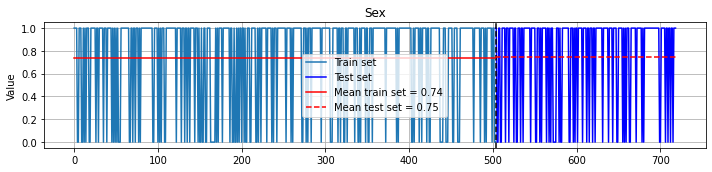

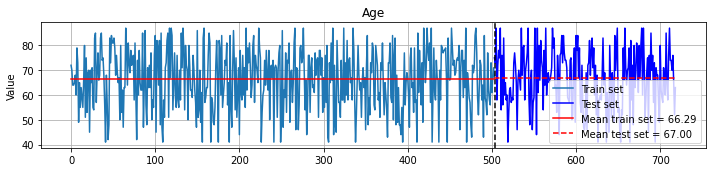

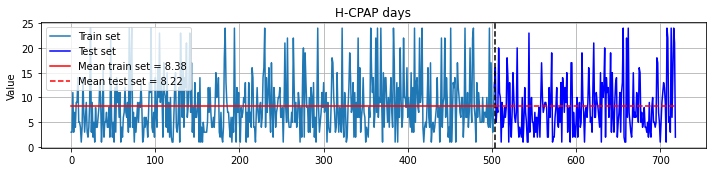

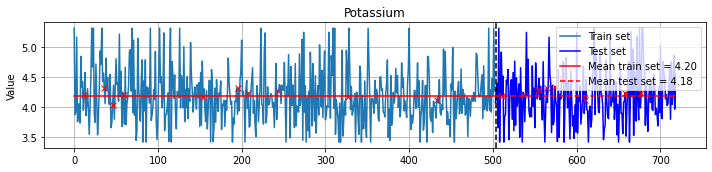

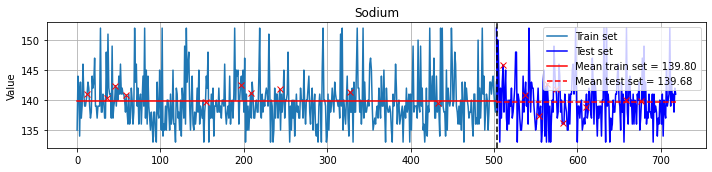

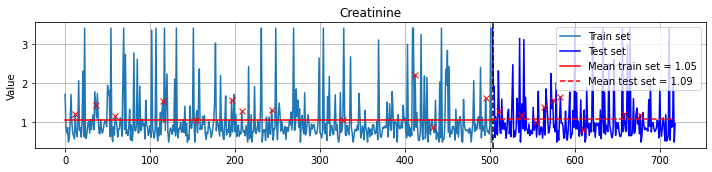

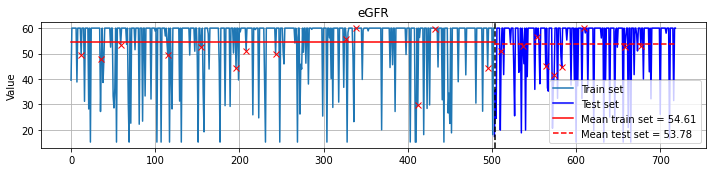

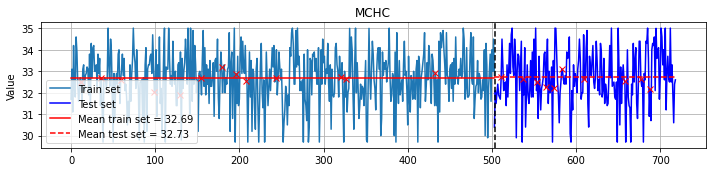

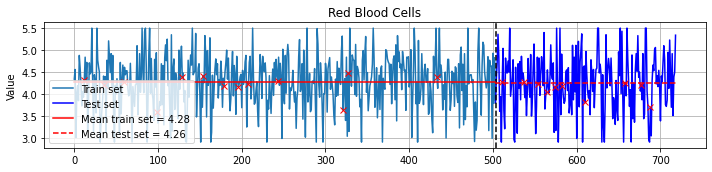

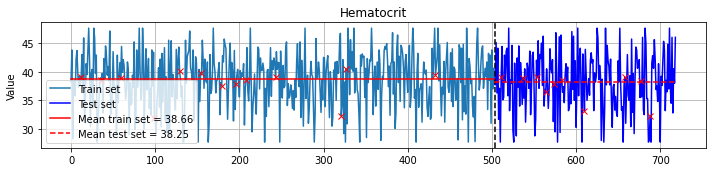

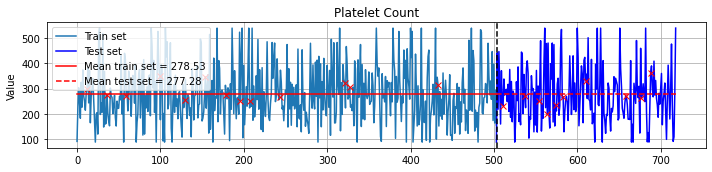

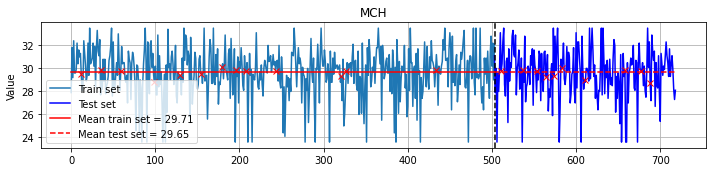

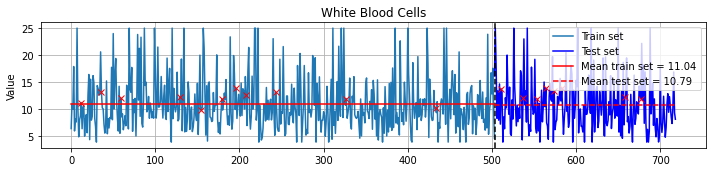

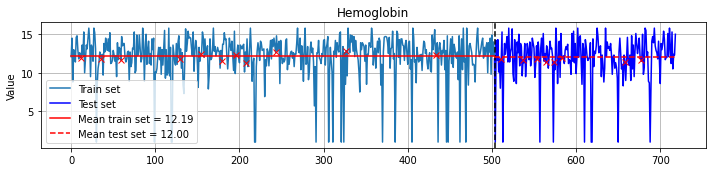

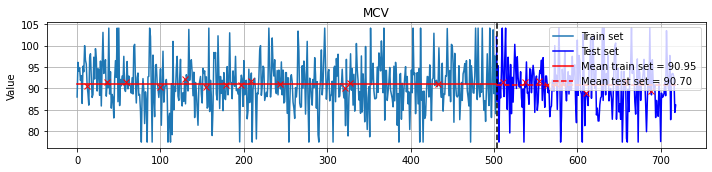

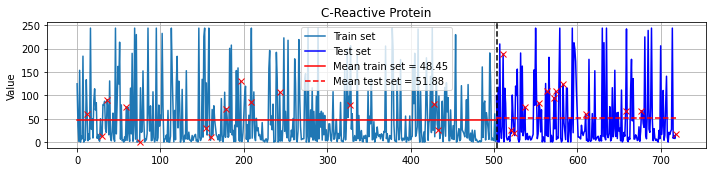

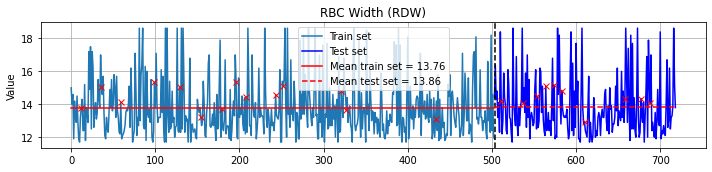

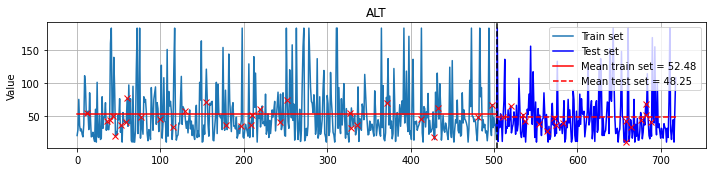

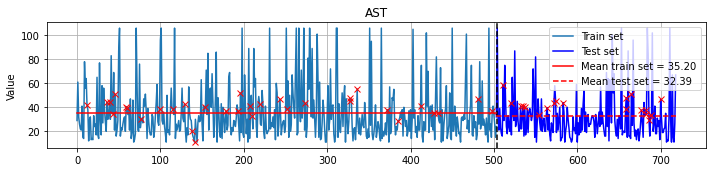

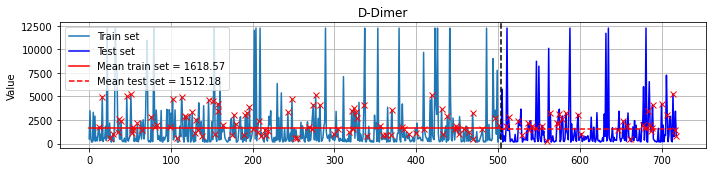

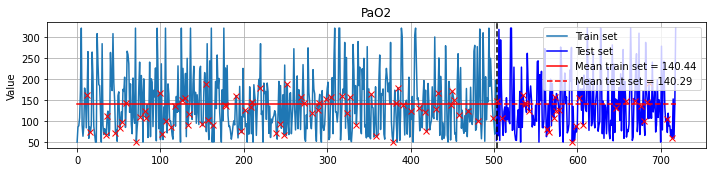

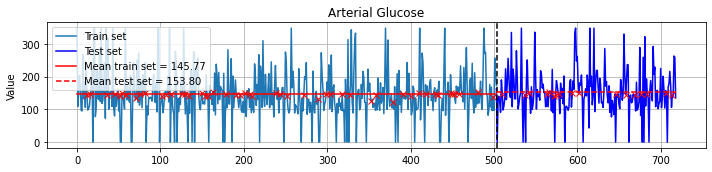

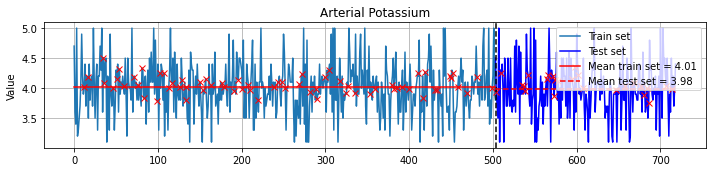

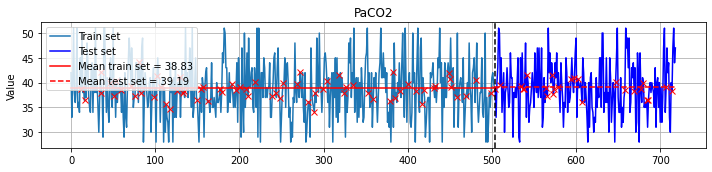

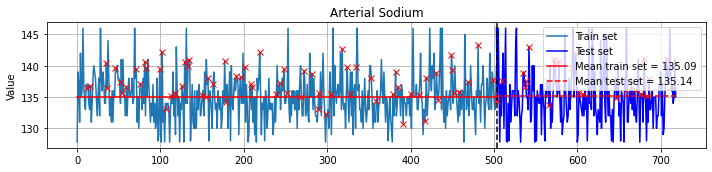

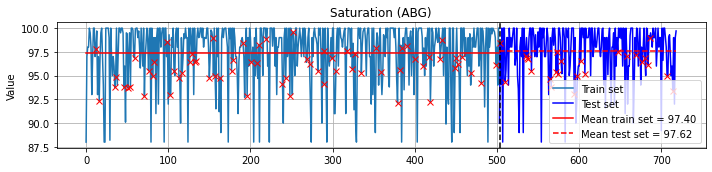

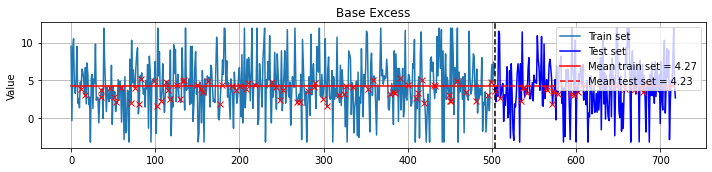

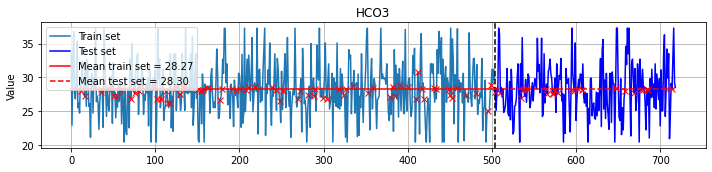

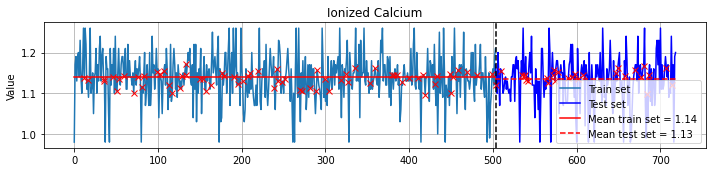

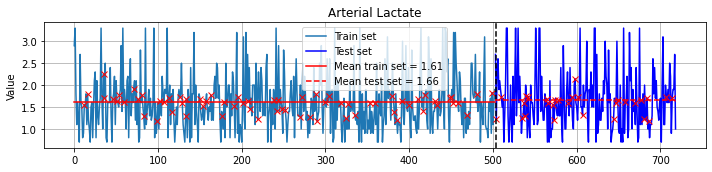

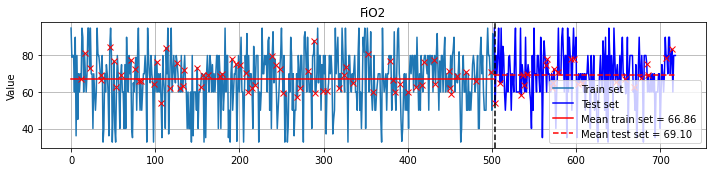

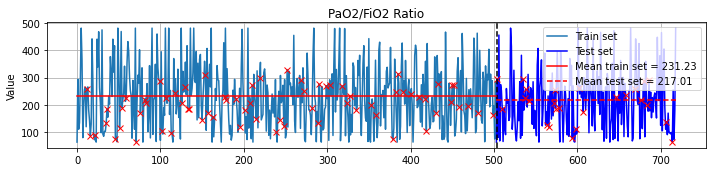

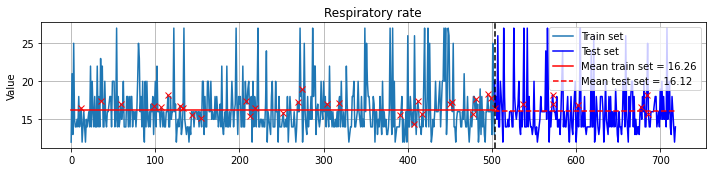

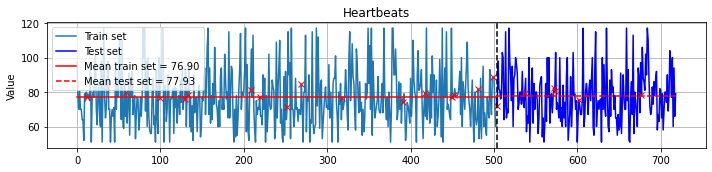

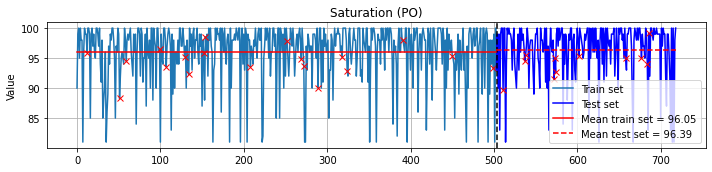

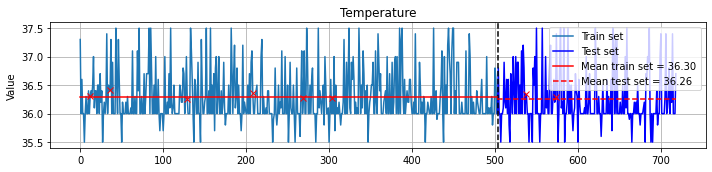

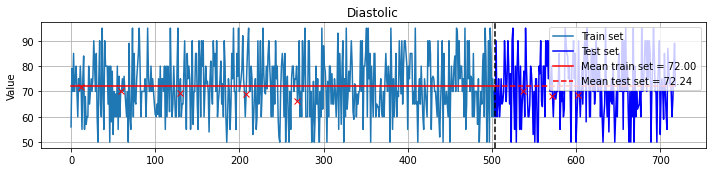

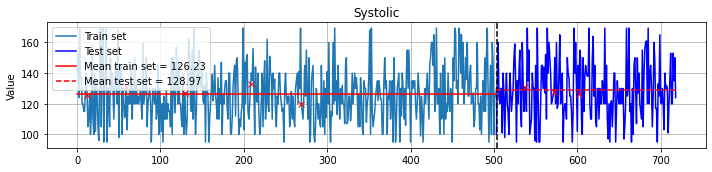

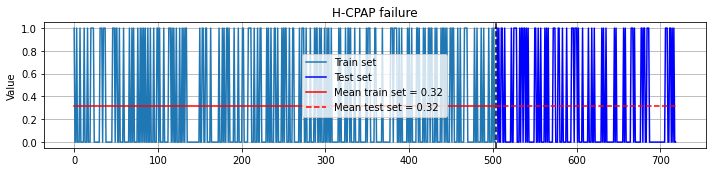

In [9]:
# PLOTTING FEATURES
#####

def plotFeature(train, test, feature=None, train_imputed=pd.Series(), test_imputed=pd.Series()):
	plt.figure(figsize=(10, 2.5))
	plt.title(feature)
	y_train, x_train = train, np.arange(0, len(train))
	y_test, x_test = test, np.arange(0, len(test))
	plt.plot(x_train, y_train, label='Train set')
	if not train_imputed.empty:
		for i, imputed in train_imputed.items():
			if imputed:
				plt.plot(x_train[i], y_train[i], color='red', marker='x')
	plt.plot(x_test+np.max(x_train), y_test, label='Test set', color='blue')
	if not test_imputed.empty:
		for i, imputed in test_imputed.items():
			if imputed:
				plt.plot(x_test[i]+np.max(x_train), y_test[i], color='red', marker='x')
	plt.axvline(x=original_features_train_shape[0], color='black', linestyle='--')
	plt.plot((0, np.max(x_train)), (np.mean(train), np.mean(train)), color='red', linestyle='-', label='Mean train set = %0.2f' % np.mean(train))
	plt.plot((np.max(x_train), np.max(x_train)+np.max(x_test)), (np.mean(test), np.mean(test)), color='red', linestyle='--', label='Mean test set = %0.2f' % np.mean(test))
	plt.ylabel("Value")
	plt.legend(loc='best')
	plt.tight_layout()
	plt.grid(True); plt.show()

# PLOT
features_labels_train = features_train.assign(**{"H-CPAP failure":labels_train})
features_labels_test = features_test.assign(**{"H-CPAP failure":labels_test})
for feature in features_labels_train.columns:
	if feature != 'H-CPAP failure':
		plotFeature(features_labels_train[feature], features_labels_test[feature], feature, features_train_imputed[feature], features_test_imputed[feature])
	else:
		plotFeature(features_labels_train[feature], features_labels_test[feature], feature)



* Standardizzazione con StandardScaler


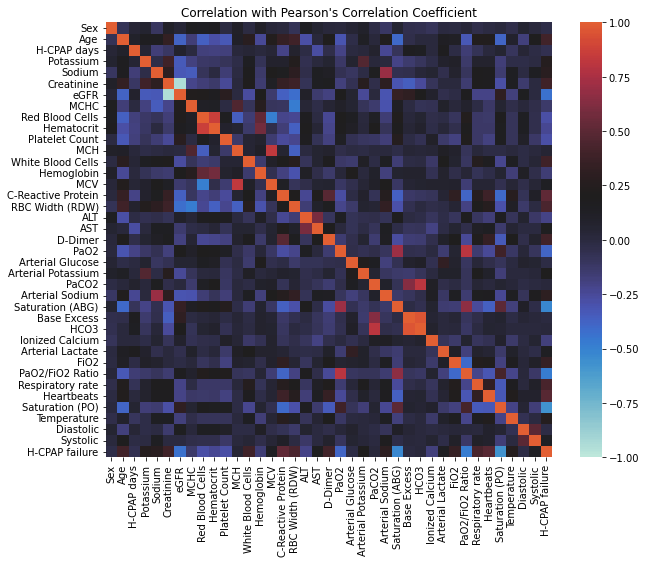

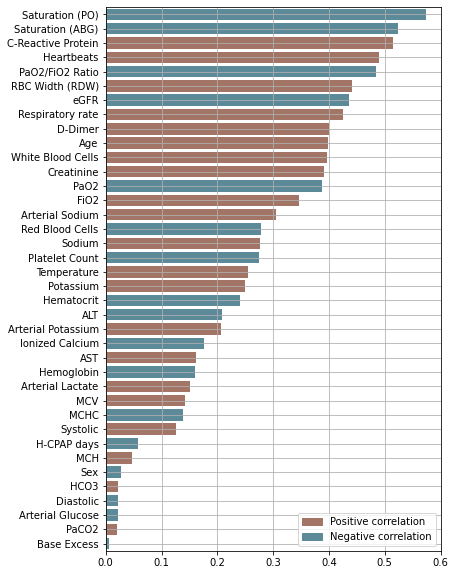

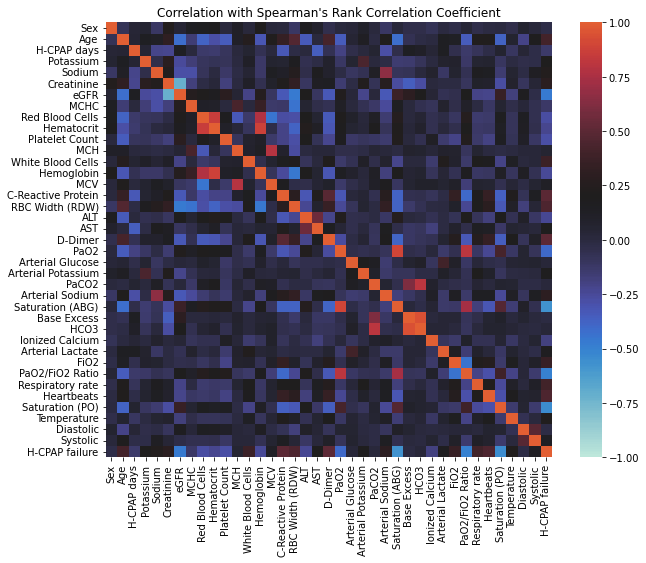

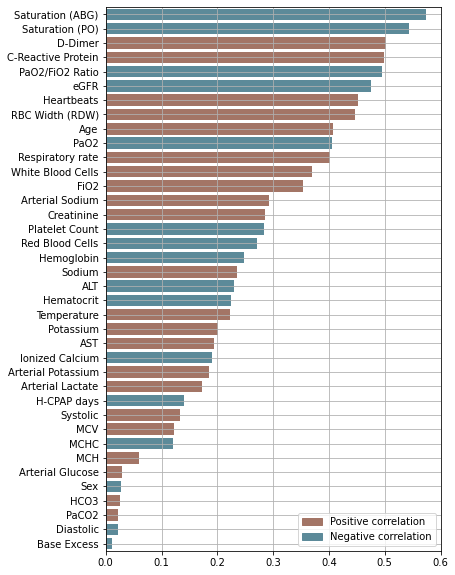

In [19]:
# CORRELATION
#####

# STANDARDIZATION
features_train_corr = features_train.copy()
features_test_corr = features_test.copy()
features_train_corr, features_test_corr, standardizer_corr = standardization(features_train_corr, features_test_corr)

# CORRELATION
corr_pearson = features_train_corr.assign(**{"H-CPAP failure":labels_train}).corr(method='pearson')

# ABS
#for i in corr_pearson.columns:
#    for j, value in corr_pearson[i].items():
#        if value < 0:
#            corr_pearson[i][j] = value * (-1)

# CLAMP
clamp = 0.0
for i in corr_pearson.columns:
    for j, value in corr_pearson[i].items():
        if value < clamp and value > -clamp:
            corr_pearson[i][j] = 0

# PLOT HEATMAP 
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_pearson,
    xticklabels=corr_pearson.columns,
    yticklabels=corr_pearson.columns,
    # cmap="YlGnBu",
    center=0.2,
	vmin=-1,
	vmax=1,
)
plt.title('Correlation with Pearson\'s Correlation Coefficient')
plt.show()

# PLOT CORRELATION WITH TARGET VARIABLE
df = corr_pearson[["H-CPAP failure"]].\
drop(["H-CPAP failure"]).\
assign(**{"H-CPAP failure absolute":lambda x: abs(x["H-CPAP failure"])}).\
rename(columns={"H-CPAP failure absolute": 'Correlation with target variable'}).\
sort_values(by='Correlation with target variable', ascending=True)
fig, ax = plt.subplots(figsize=(6,10))  # Adjust the figure size
for i, (val_abs, val) in enumerate(zip(df['Correlation with target variable'], df['H-CPAP failure'])):
	color = '#5C8A99' if val < 0 else '#A37566'
	ax.barh(df.index[i], abs(val_abs), color=color)  # Use barh for horizontal bars
plt.grid(True)
plt.xlim(0.0, 0.6)  # Adjust the x-limits of the plot
plt.ylim(-0.5, len(df.index)-0.5)  # Adjust the y-limits of the plot
#plt.axvline(x=percentuale, color='r', linestyle='-')  # Draw a vertical line
# Percentages
#vals = ax.get_xticks()
#ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])  # Set the x-tick labels
# Add labels for the two categories
positive = mpatches.Patch(color='#A37566', label='Positive correlation')
negative = mpatches.Patch(color='#5C8A99', label='Negative correlation')
plt.legend(handles=[positive, negative])
plt.show()

# CORRELATION
corr_spearman = features_train_corr.assign(**{"H-CPAP failure":labels_train}).corr(method='spearman')

# ABS
#for i in corr_spearman.columns:
#    for j, value in corr_spearman[i].items():
#        if value < 0:
#            corr_spearman[i][j] = value * (-1)

# CLAMP
clamp = 0.0
for i in corr_spearman.columns:
    for j, value in corr_spearman[i].items():
        if value < clamp and value > -clamp:
            corr_spearman[i][j] = 0

# PLOT HEATMAP 
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_spearman,
    xticklabels=corr_spearman.columns,
    yticklabels=corr_spearman.columns,
    # cmap="YlGnBu",
    center=0.2,
	vmin=-1,
	vmax=1,
)
plt.title('Correlation with Spearman\'s Rank Correlation Coefficient')
plt.show()

# PLOT CORRELATION WITH TARGET VARIABLE
df = corr_spearman[["H-CPAP failure"]].\
drop(["H-CPAP failure"]).\
assign(**{"H-CPAP failure absolute":lambda x: abs(x["H-CPAP failure"])}).\
rename(columns={"H-CPAP failure absolute": 'Correlation with target variable'}).\
sort_values(by='Correlation with target variable', ascending=True)
fig, ax = plt.subplots(figsize=(6,10))  # Adjust the figure size
for i, (val_abs, val) in enumerate(zip(df['Correlation with target variable'], df['H-CPAP failure'])):
	color = '#5C8A99' if val < 0 else '#A37566'
	ax.barh(df.index[i], abs(val_abs), color=color)  # Use barh for horizontal bars
plt.grid(True)
plt.xlim(0.0, 0.6)  # Adjust the x-limits of the plot
plt.ylim(-0.5, len(df.index)-0.5)  # Adjust the y-limits of the plot
#plt.axvline(x=percentuale, color='r', linestyle='-')  # Draw a vertical line
# Percentages
#vals = ax.get_xticks()
#ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])  # Set the x-tick labels
# Add labels for the two categories
positive = mpatches.Patch(color='#A37566', label='Positive correlation')
negative = mpatches.Patch(color='#5C8A99', label='Negative correlation')
plt.legend(handles=[positive, negative])
plt.show()


Lasso best alpha hyperparameter: 0.0033473543793010314
ElasticNet l1_ratio: 0.5


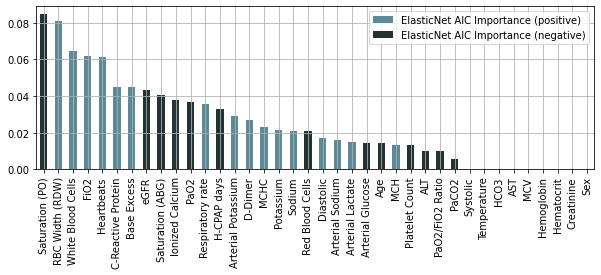

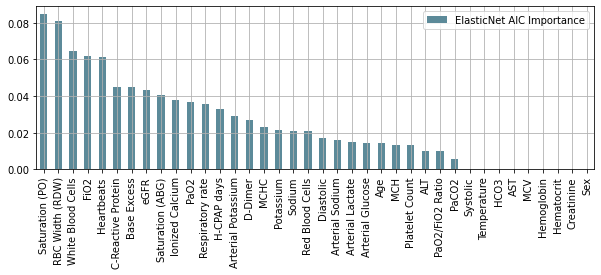

Lasso best alpha hyperparameter: 0.02876193366903098
ElasticNet l1_ratio: 0.5


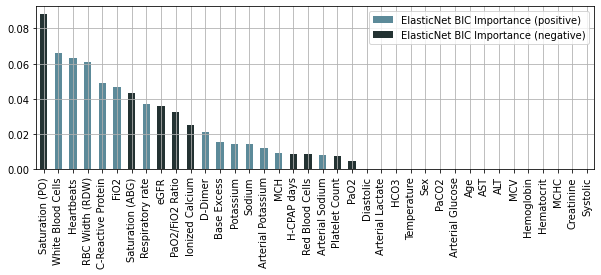

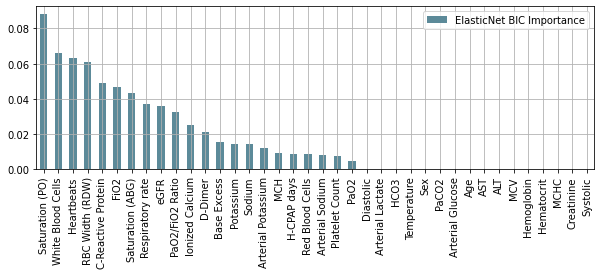

In [17]:
# FEATURE IMPORTANCE LASSO BIC
#####

from sklearn.linear_model import ElasticNet, LassoLarsIC
from sklearn.pipeline import Pipeline


criteria = ['AIC', 'BIC']
l1_ratio = 0.5

# FOR EACH CRITERION
for criterion in criteria:

	# COMPUTE ALPHA PARAMETER
	lasso_bic_pipeline = Pipeline([
		('scaler',StandardScaler()),
		('model',LassoLarsIC(criterion=criterion.lower())),
	]).fit(features_train, labels_train)

	# EXTRACT DATA & COMPUTE
	results = pd.DataFrame(
		{
			"alphas": lasso_bic_pipeline['model'].alphas_,
			"criterion": lasso_bic_pipeline['model'].criterion_,
		}
	).set_index("alphas")
	alpha_bic = lasso_bic_pipeline['model'].alpha_

	# SHOW
	print('Lasso best alpha hyperparameter:', alpha_bic)
	print('ElasticNet l1_ratio:', l1_ratio)

	# FIT LASSO MODEL
	lasso_pipeline = Pipeline([
		('scaler',StandardScaler()),
		('model',ElasticNet(random_state=seed, alpha=alpha_bic, l1_ratio=l1_ratio)),
	]).fit(features_train, labels_train)

	# COMPUTE COEFFICIENTS
	lasso_coefficients = lasso_pipeline.named_steps['model'].coef_
	lasso_importances = np.abs(lasso_coefficients)
	#print('Lasso ' + criterion + ' feature importances:\n', lasso_importances)
	#print('Features with importance > 0:', np.array(features_train.columns)[lasso_importances <= 0])

	# STORE COEFFICIENTS
	feats = {} # a dict to hold feature_name: feature_importance
	for feature, coefficient, importance in zip(features_train.columns, lasso_coefficients, lasso_importances):
		feats[feature] = {
			'Lasso_' + criterion + '_Coefficient': coefficient,
			'Lasso_' + criterion + '_Importance': importance,
			'ElasticNet ' + criterion + ' Importance': importance,
			'ElasticNet ' + criterion + ' Importance (positive)': importance if coefficient > 0 else 0,
			'ElasticNet ' + criterion + ' Importance (negative)': importance if coefficient < 0 else 0,
		}

	# PLOT
	pd.DataFrame.from_dict(feats, orient='index').\
	sort_values(by='Lasso_' + criterion + '_Importance', ascending=False).\
	plot(
		kind='bar', rot=90, figsize=(10,3),
		y=['ElasticNet ' + criterion + ' Importance (positive)', 'ElasticNet ' + criterion + ' Importance (negative)'],
		stacked=True, grid=True, color=['#5C8A99', '#233232']
	)
	plt.grid(True); plt.show()

	# PLOT2
	pd.DataFrame.from_dict(feats, orient='index').\
	sort_values(by='ElasticNet ' + criterion + ' Importance', ascending=False).\
	plot(
		kind='bar', rot=90, figsize=(10,3),
		y=['ElasticNet ' + criterion + ' Importance'],
		stacked=True, grid=True, color=['#5C8A99']
	)
	plt.grid(True); plt.show()


In [3]:
# PREPROCESSING
#####

# SHUFFLE TRAINING SET E TESTING SET
#features_train, features_test, labels_train, labels_test = shuffle_training_set_e_testing_set(features_train, features_test, labels_train, labels_test)

# DISCRETIZZAZIONE
#features_train, features_test, discr = discretizing(features_train, features_test)

# STANDARDIZATION
#features_train, features_test, standardizer = standardization(features_train, features_test)

# SCALING
features_train, features_test, scaler = scaling(features_train, features_test, True)

# SAVE SCALER
save = False
if save:
	folder_scaler = "datasets"
	try:
		os.makedirs(folder_scaler)
	except OSError as error:
		pass
	dump(scaler, folder_scaler + "/scaler.joblib", compress=9)


+-----------------------------------------------------------------+
|                           Best params                           |
+--------------+-------------------+------------------+-----------+
| n_estimators | min_samples_split | min_samples_leaf | max_depth |
+--------------+-------------------+------------------+-----------+
|     250      |         8         |        4         |     8     |
+--------------+-------------------+------------------+-----------+


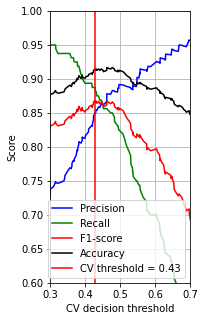

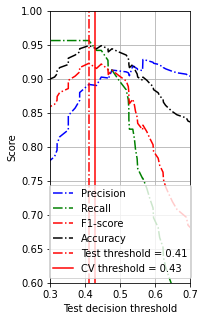

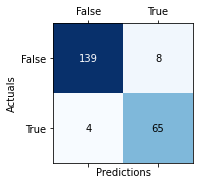

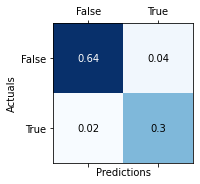

+--------------------------------------------------------------+
|           RandomForestClassifier with 38 features            |
+----------------------+----------+-----------+--------+-------+
|                      | Accuracy | Precision | Recall |   F1  |
+----------------------+----------+-----------+--------+-------+
|  Validation (mean)   |  91.47   |   85.03   | 88.75  | 86.85 |
| Validation (std.dev) |   1.75   |    3.04   |  3.64  |  2.96 |
|         Test         |  94.44   |   89.04   | 94.20  | 91.55 |
+----------------------+----------+-----------+--------+-------+


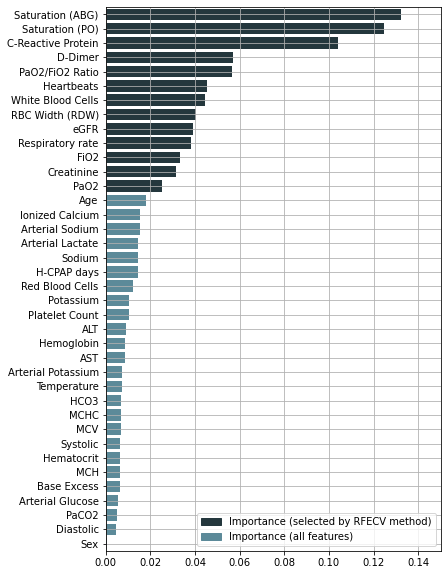

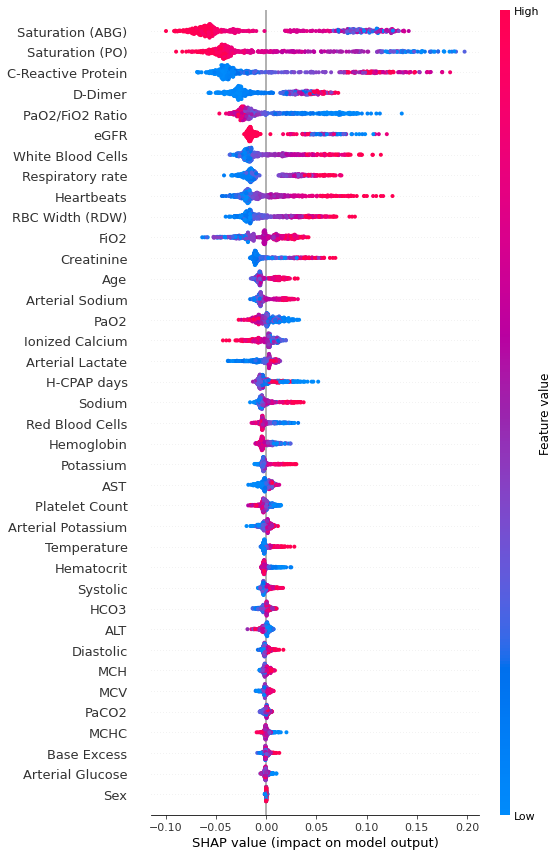

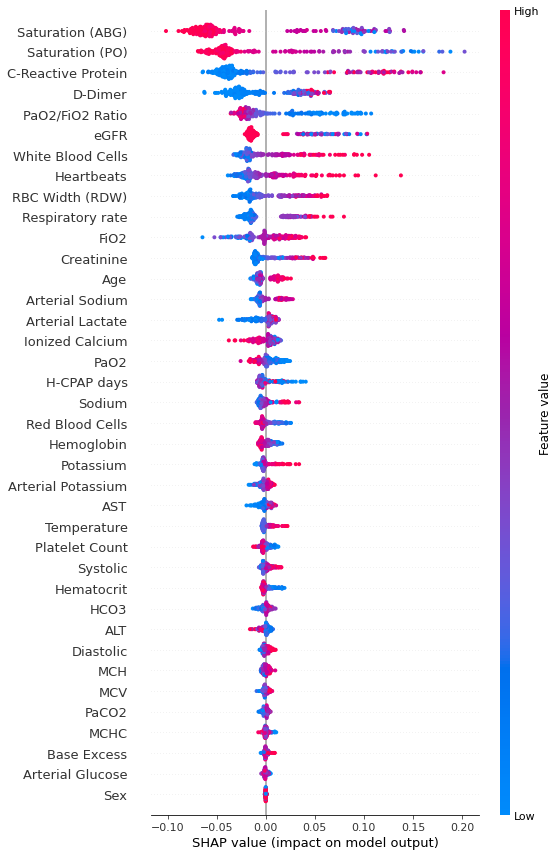

In [10]:
# RANDOM FOREST
#####

from sklearn.ensemble import RandomForestClassifier


fit_and_save = False
model_name = "models_vimercate/RandomForest"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'max_depth': [2, 4, 8, 10], # più è basso e meno overfitta
	'min_samples_leaf': [2, 4, 8, 10], # più è basso e più overfitta
	'min_samples_split': [2, 4, 8, 10], # più basso è e più overfitta
	'n_estimators': [250, 500, 1000],
}

# MODEL SCORES
scorers = {
	'precision_score': make_scorer(precision_score),
	'recall_score': make_scorer(recall_score),
	'accuracy_score': make_scorer(accuracy_score),
	'f1_score': make_scorer(f1_score),
	'roc_auc_score': make_scorer(roc_auc_score),
}

# MODEL
model = RandomizedSearchCV(
	estimator=RandomForestClassifier(random_state=seed),
	param_distributions=param_grid,
	cv=skf,
	scoring=scorers,
	refit='f1_score',
	n_iter=10,
	n_jobs=-1,
	verbose=1,
	return_train_score=False,
	random_state=seed
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# GET CROSS VALIDATION SCORES
validation_scores = {}
if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
	cv_results = model.cv_results_
	best_index = model.best_index_
	for scorer in scorers.keys():
		validation_scores[scorer] = {
			'mean': cv_results['mean_test_' + scorer][best_index],
			'std_dev': cv_results['std_test_' + scorer][best_index]
		}

# PLOT CROSS VALIDATION SCORES
#table = PrettyTable(
#	title = str(model.__class__.__name__) + ' with ' + str(features_train.shape[1]) + " features",
#	field_names=["Cross-validation", "Accuracy", "Precision", "Recall", "F1"],
#	float_format='.2'
#)
#table.add_row([
#	"Mean",
#	validation_scores['accuracy_score']['mean']*100,
#	validation_scores['precision_score']['mean']*100,
#	validation_scores['recall_score']['mean']*100,
#	validation_scores['f1_score']['mean']*100,
#])
#table.add_row([
#	"Std.dev.",
#	validation_scores['accuracy_score']['std_dev']*100,
#	validation_scores['precision_score']['std_dev']*100,
#	validation_scores['recall_score']['std_dev']*100,
#	validation_scores['f1_score']['std_dev']*100
#])
#print(table)

# BEST PARAMS
if hasattr(model, 'best_params_'):
	table = PrettyTable(title="Best params", field_names=list(model.best_params_.keys()))
	table.add_row(list(model.best_params_.values()))
	print(table)

# BEST MODEL
if hasattr(model, 'best_estimator_'):
	model = model.best_estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = max_f1_thresh

# PREDICT TRAIN
#for i in np.arange(0.4, 0.6, 0.01):
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)

report_train = report

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
table.add_row(["Validation (std.dev)",	validation_scores['accuracy_score']['std_dev']*100, validation_scores['precision_score']['std_dev']*100, validation_scores['recall_score']['std_dev']*100, validation_scores['f1_score']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
coefficients = model.feature_importances_
#feature_importance = pd.DataFrame({'Feature': features_train.columns, 'Importance': coefficients})
#feature_importance = feature_importance.sort_values('Importance', ascending=True)
#feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
#plt.grid(True); plt.show()
df = pd.DataFrame({'Importance': coefficients}, index = features_train.columns).\
sort_values(by='Importance', ascending=True)
fig, ax = plt.subplots(figsize=(6,10))  # Adjust the figure size
for i, val in enumerate(df['Importance']):
	color = '#5C8A99' if df.index[i] not in ['Saturation (ABG)', 'Saturation (PO)', 'C-Reactive Protein', 'PaO2/FiO2 Ratio', 'D-Dimer', 'White Blood Cells', 'FiO2', 'eGFR', 'RBC Width (RDW)', 'Respiratory rate', 'Heartbeats', 'Creatinine', 'PaO2'] else '#24373D'
	ax.barh(df.index[i], val, color=color)  # Use barh for horizontal bars
plt.grid(True)
plt.xlim(0.0, 0.15)  # Adjust the x-limits of the plot
plt.ylim(-0.5, len(df.index)-0.5)  # Adjust the y-limits of the plot
#plt.axvline(x=percentuale, color='r', linestyle='-')  # Draw a vertical line
# Percentages
#vals = ax.get_xticks()
#ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])  # Set the x-tick labels
# Add labels for the two categories
importance = mpatches.Patch(color='#5C8A99', label='Importance (all features)')
importance_sel = mpatches.Patch(color='#24373D', label='Importance (selected by RFECV method)')
plt.legend(handles=[importance_sel, importance])
plt.show()

# SHAP TRAIN
feature_importances_shap = calcola_shap(model, features_train, labels_train, plot=True)
feature_importances_shap2 = calcola_shap(model, features_test, labels_test, plot=True)
#print(feature_importances_shap)


+-----------------------------------------+
| RandomForestClassifier with 13 features |
+---------------------------+-------------+
|          Feature          |   Ranking   |
+---------------------------+-------------+
|         Creatinine        |      1      |
|            eGFR           |      1      |
|     White Blood Cells     |      1      |
|     C-Reactive Protein    |      1      |
|      RBC Width (RDW)      |      1      |
|          D-Dimer          |      1      |
|            PaO2           |      1      |
|      Saturation (ABG)     |      1      |
|            FiO2           |      1      |
|      PaO2/FiO2 Ratio      |      1      |
|      Respiratory rate     |      1      |
|         Heartbeats        |      1      |
|      Saturation (PO)      |      1      |
|      Arterial Lactate     |      2      |
|      Ionized Calcium      |      3      |
|            Age            |      4      |
|      Arterial Sodium      |      5      |
|        H-CPAP days        |   

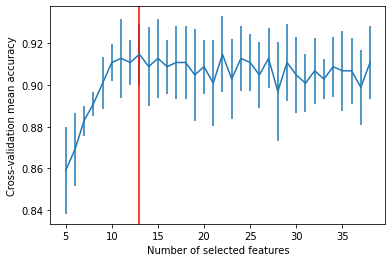

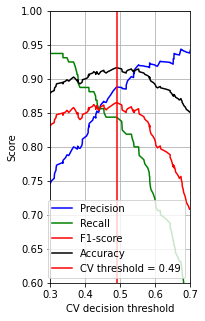

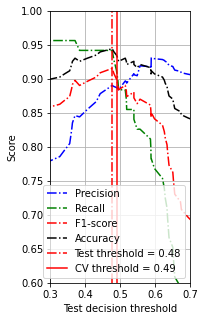

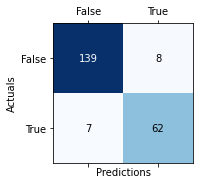

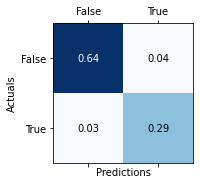

+-----------------------------------------------------------+
|          RandomForestClassifier with 13 features          |
+-------------------+----------+-----------+--------+-------+
|                   | Accuracy | Precision | Recall |   F1  |
+-------------------+----------+-----------+--------+-------+
| Validation (mean) |  91.67   |   88.82   | 84.38  | 86.54 |
|        Test       |  93.06   |   88.57   | 89.86  | 89.21 |
+-------------------+----------+-----------+--------+-------+


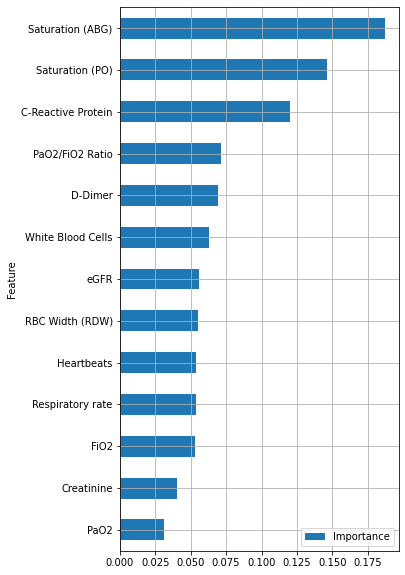

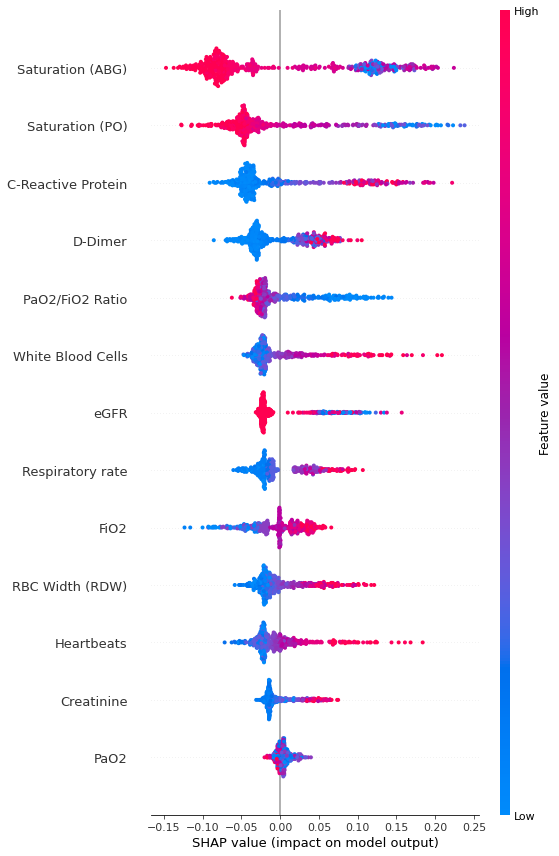

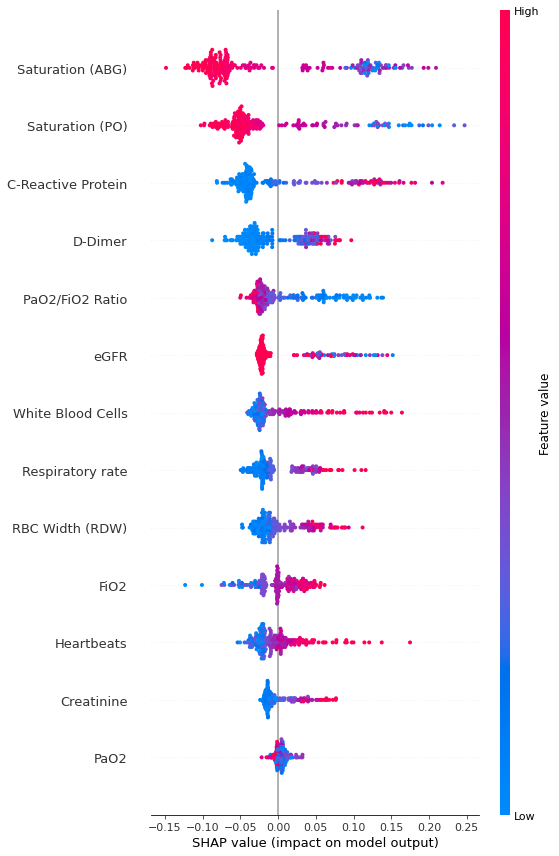

In [4]:
# RANDOM FOREST RFECV
#####

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV


fit_and_save = False
model_name = "models_vimercate/RandomForestRFECV"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

features_train_local, features_test_local = features_train, features_test

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'max_depth': 8, # più è basso e meno overfitta
	'min_samples_leaf': 4, # più è basso e più overfitta
	'min_samples_split': 8, # più basso è e più overfitta
	'n_estimators': 250,
}

# MODEL
min_features_to_select = 5
model = RFECV(
	estimator=RandomForestClassifier(random_state=seed, **param_grid),
	cv=skf,
	scoring='accuracy',
	step=1,
	n_jobs=-1,
	verbose=0,
	min_features_to_select=min_features_to_select
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train_local, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# BEST FEATURES
if hasattr(model, 'n_features_') and hasattr(model, 'ranking_') and hasattr(model, 'feature_names_in_'):
	# Print table
	ranking = dict(zip(model.feature_names_in_, model.ranking_))
	ranking = OrderedDict(sorted(ranking.items(), key=lambda x: x[1]))
	table = PrettyTable(title=str(model.estimator_.__class__.__name__) + ' with ' + str(model.n_features_) + " features", field_names=["Feature", "Ranking"])
	to_drop = []
	for (key, val) in zip(list(ranking.keys()), list(ranking.values())):
		table.add_row([key, val])
		if val != 1:
			to_drop.append(key)
	print(table)
	# Delete features from train and test
	features_train_local = drop_features(features_train_local, columns=to_drop, silent=True)
	features_test_local = drop_features(features_test_local, columns=to_drop, silent=True)
	
# PLOT
if hasattr(model, 'cv_results_') and hasattr(model, 'n_features_'):
	n_scores = len(model.cv_results_["mean_test_score"])
	plt.figure()
	plt.xlabel("Number of selected features")
	plt.ylabel("Cross-validation mean accuracy")
	plt.errorbar(
		range(min_features_to_select, n_scores + min_features_to_select),
		model.cv_results_["mean_test_score"],
		yerr=model.cv_results_["std_test_score"],
	)
	plt.axvline(x = model.n_features_, color = 'r', label = "Number of selected features: %0.0f" % model.n_features_)
	plt.show()

# BEST MODEL
if hasattr(model, 'estimator_'):
	model = model.estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train_local, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = max_f1_thresh

# PREDICT TRAIN
#for i in np.arange(0.4, 0.6, 0.01):
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)

report_train = report

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test_local)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test_local)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train_local.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
#table.add_row(["Validation (std.dev)",	validation_scores['accuracy']['std_dev']*100, validation_scores['precision']['std_dev']*100, validation_scores['recall']['std_dev']*100, validation_scores['f1']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
coefficients = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features_train_local.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

# SHAP TRAIN
feature_importances_shap = calcola_shap(model, features_train_local, labels_train, plot=True)
feature_importances_shap2 = calcola_shap(model, features_test_local, labels_test, plot=True)
#print(feature_importances_shap)


In [11]:
# RANDOM FOREST RFE
#####
"""
fit_and_save = True
model_name = "models_vimercate/RandomForestRFE"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# FEATURE ELIMINATION
results = []
features_train_local, features_test_local = features_train, features_test
for j in tqdm_notebook(range(features_train_local.shape[1])):

	if features_train_local.shape[1] == 0:
		break

	# STRATIFIED KFOLD
	skf = StratifiedKFold(
		n_splits=5,
		shuffle=True,
		random_state=seed,
	)

	# PARAMS
	param_grid = {
		'max_depth': [2, 4, 8, 10], # più è basso e meno overfitta
		'min_samples_leaf': [2, 4, 8, 10], # più è basso e più overfitta
		'min_samples_split': [2, 4, 8, 10], # più basso è e più overfitta
		'n_estimators': [250, 500, 1000],
	}

	# MODEL SCORES
	scorers = {
		'precision_score': make_scorer(precision_score),
		'recall_score': make_scorer(recall_score),
		'accuracy_score': make_scorer(accuracy_score),
		'f1_score': make_scorer(f1_score),
		'roc_auc_score': make_scorer(roc_auc_score),
	}

	# MODEL
	model = RandomizedSearchCV(
		estimator=RandomForestClassifier(random_state=seed),
		param_distributions=param_grid,
		cv=skf,
		scoring=scorers,
		refit='f1_score',
		n_iter=10,
		n_jobs=-1,
		verbose=0,#1,
		return_train_score=False,
		random_state=seed
	)

	# SAVE OR RESTORE THE MODEL
	if fit_and_save:
		model.fit(features_train_local, labels_train)
		dump(model, model_name + "/model" + str(j) + ".joblib", compress=9)
	else:
		model = load(model_name + "/model" + str(j) + ".joblib")

	# GET CROSS VALIDATION SCORES
	validation_scores = {}
	if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
		cv_results = model.cv_results_
		best_index = model.best_index_
		for scorer in scorers.keys():
			validation_scores[scorer] = {
				'mean': cv_results['mean_test_' + scorer][best_index],
				'std_dev': cv_results['std_test_' + scorer][best_index]
			}

	# BEST MODEL
	if hasattr(model, 'best_estimator_'):
		model = model.best_estimator_

	# CROSS-VALIDATION RESULTS
	predict_proba_cross_val = cross_val_predict(model, features_train_local, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

	# THRESHOLD FINETUNING
	accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
	max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
	threshold = max_f1_thresh

	# PREDICT TRAIN
	labels_pred = (predict_proba_cross_val >= threshold).astype(float)
	#labels_pred = model.predict(features_train_local)
	report = classification_report(labels_train, labels_pred, output_dict=True)
	confusion = confusion_matrix(labels_train, labels_pred)

	report_train = report

	# PREDICT TEST
	labels_pred = (model.predict_proba(features_test_local)[:,1] >= threshold).astype(float)
	#labels_pred = model.predict(features_test_local)
	report = classification_report(labels_test, labels_pred, output_dict=True)
	confusion = confusion_matrix(labels_test, labels_pred)

	# IMPORTANCES
	coefficients = model.feature_importances_
	feature_importances = pd.DataFrame({'Feature': features_train_local.columns, 'Importance': coefficients})
	#feature_importance = feature_importance.sort_values('Importance', ascending=True)
	#feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
	#plt. grid(True)
	#plt.show()

	# SHAP TRAIN
	#feature_importances_shap = calcola_shap(model, features_train_local, labels_train)

	# DROP COLONNE CON POCA IMPORTANZA
	to_drop = []
	for i, (feature, importance) in enumerate(zip(feature_importances['Feature'], feature_importances['Importance'])):
		if importance <= min(feature_importances['Importance']):
			# SAVE RESULTS
			results.append({'train': report_train, 'test': report, 'features': features_train_local.shape[1]-len(to_drop), 'importances': feature_importances, 'thresholds': threshold, 'confusions': confusion})
			# DROP
			to_drop.append(feature)
			break
	features_train_local = drop_features(features_train_local, columns=to_drop, silent=True)
	features_test_local = drop_features(features_test_local, columns=to_drop, silent=True)

# PLOT RFE'S RESULTS
train_accuracy = [result['train']['accuracy'] for i, result in enumerate(results)]
test_accuracy = [result['test']['accuracy'] for i, result in enumerate(results)]
train_F1 = [result['train']['0']['f1-score'] for i, result in enumerate(results)]
test_F1 = [result['test']['0']['f1-score'] for i, result in enumerate(results)]
n_features = [result['features'] for i, result in enumerate(results)]
thresholds = [result['thresholds'] for i, result in enumerate(results)]
confusions = [result['confusions'] for i, result in enumerate(results)]

# APPROXIMATION
approximation_grade = 2
train_accuracy_approx_params = np.polyfit(n_features, train_accuracy, approximation_grade)
train_accuracy_approx = np.poly1d(train_accuracy_approx_params)

# CALCULATE BEST INDEX
first_acceptable_value_index = np.argmax(train_accuracy_approx(n_features))

# PLOT
plt.plot(n_features, train_accuracy, label="Validation accuracy = %0.3f" % train_accuracy[first_acceptable_value_index], color="blue")
plt.plot(n_features, train_F1, label="Validation F1 = %0.3f" % train_F1[first_acceptable_value_index], color="green", linestyle="dotted")
plt.plot(n_features, train_accuracy_approx(n_features), label="Validation accuracy approximation (%0.0f degrees)" % approximation_grade, color="blue", linestyle="dashed")
#plt.plot(n_features, test_accuracy, label="Test accuracy = %0.3f" % test_accuracy[first_acceptable_value_index], color="orange")
#plt.plot(n_features, test_F1, label="Test F1 = %0.3f" % test_F1[first_acceptable_value_index], color="orange", linestyle="dotted")
plt.xlabel('Number of features used')
plt.ylabel('Scores')
plt.axvline(x = n_features[first_acceptable_value_index], color = 'r', label = "Number of selected features: %0.0f" % n_features[first_acceptable_value_index])
plt.ylim(0.8, 0.95)
plt.xlim(max(n_features), min(n_features))
plt.legend(loc='lower left')
plt.grid(True); plt.show()

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusions[first_acceptable_value_index])

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(n_features[first_acceptable_value_index]) + " features (threshold: %0.2f)" % thresholds[first_acceptable_value_index],
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row([
	"Validation", results[first_acceptable_value_index]['train']['accuracy']*100, results[first_acceptable_value_index]['train']['1']['precision']*100,
	results[first_acceptable_value_index]['train']['1']['recall']*100,	results[first_acceptable_value_index]['train']['1']['f1-score']*100
])
table.add_row([
	"Test", results[first_acceptable_value_index]['test']['accuracy']*100, results[first_acceptable_value_index]['test']['1']['precision']*100,
	results[first_acceptable_value_index]['test']['1']['recall']*100, results[first_acceptable_value_index]['test']['1']['f1-score']*100
	])
print(table)

# PLOT FEATURE IMPORTANCES
results[first_acceptable_value_index]['importances'].sort_values('Importance', ascending=True).plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True); plt.show()
"""

'\nfit_and_save = True\nmodel_name = "models_vimercate/RandomForestRFE"\ntry:\n\tos.makedirs(model_name)\nexcept OSError as error:\n\tpass\n\n# FEATURE ELIMINATION\nresults = []\nfeatures_train_local, features_test_local = features_train, features_test\nfor j in tqdm_notebook(range(features_train_local.shape[1])):\n\n\tif features_train_local.shape[1] == 0:\n\t\tbreak\n\n\t# STRATIFIED KFOLD\n\tskf = StratifiedKFold(\n\t\tn_splits=5,\n\t\tshuffle=True,\n\t\trandom_state=seed,\n\t)\n\n\t# PARAMS\n\tparam_grid = {\n\t\t\'max_depth\': [2, 4, 8, 10], # più è basso e meno overfitta\n\t\t\'min_samples_leaf\': [2, 4, 8, 10], # più è basso e più overfitta\n\t\t\'min_samples_split\': [2, 4, 8, 10], # più basso è e più overfitta\n\t\t\'n_estimators\': [250, 500, 1000],\n\t}\n\n\t# MODEL SCORES\n\tscorers = {\n\t\t\'precision_score\': make_scorer(precision_score),\n\t\t\'recall_score\': make_scorer(recall_score),\n\t\t\'accuracy_score\': make_scorer(accuracy_score),\n\t\t\'f1_score\': make_scorer

+------------------------------------------------------+
|                     Best params                      |
+-----------+--------------+-----------+---------------+
| subsample | n_estimators | max_depth | learning_rate |
+-----------+--------------+-----------+---------------+
|    0.7    |     100      |     3     |      0.1      |
+-----------+--------------+-----------+---------------+


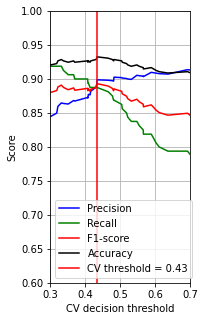

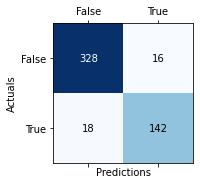

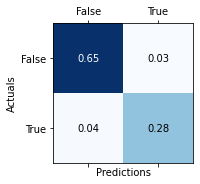

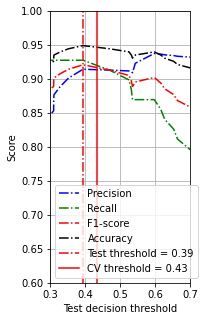

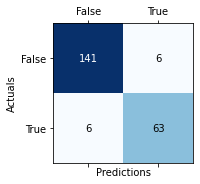

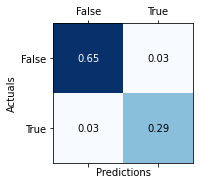

+--------------------------------------------------------------+
|         GradientBoostingClassifier with 38 features          |
+----------------------+----------+-----------+--------+-------+
|                      | Accuracy | Precision | Recall |   F1  |
+----------------------+----------+-----------+--------+-------+
|  Validation (mean)   |  93.25   |   89.87   | 88.75  | 89.31 |
| Validation (std.dev) |   2.83   |    4.35   |  6.43  |  4.83 |
|         Test         |  94.44   |   91.30   | 91.30  | 91.30 |
+----------------------+----------+-----------+--------+-------+


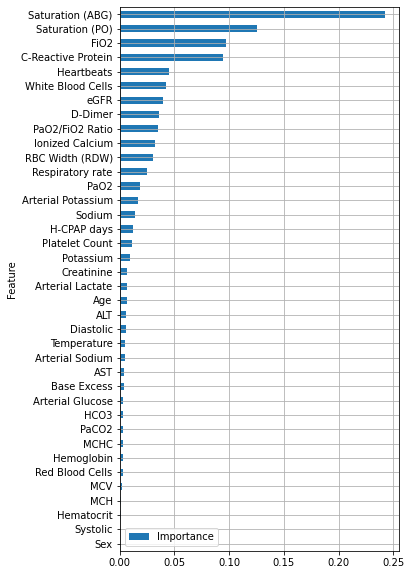

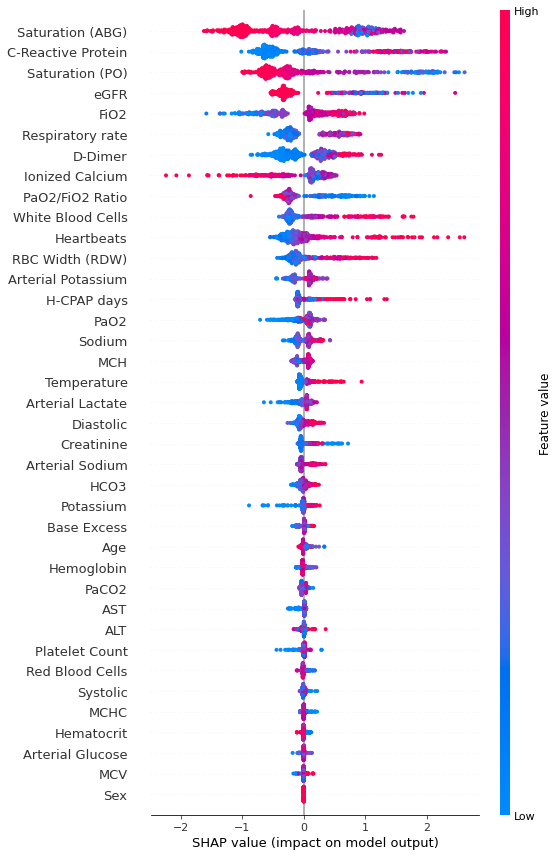

In [44]:
# XGBOOST
#####

# Functions
import importlib
import functions
importlib.reload(functions)
from functions import *

from sklearn.ensemble import GradientBoostingClassifier


fit_and_save = False
model_name = "models_vimercate/XGBoost"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.7, 1],
    'n_estimators': [50, 100],
}

# MODEL SCORES
scorers = {
	'precision_score': make_scorer(precision_score),
	'recall_score': make_scorer(recall_score),
	'accuracy_score': make_scorer(accuracy_score),
	'f1_score': make_scorer(f1_score),
	'roc_auc_score': make_scorer(roc_auc_score),
}

# MODEL
model = RandomizedSearchCV(
	estimator=GradientBoostingClassifier(random_state=seed),
	param_distributions=param_grid,
	cv=skf,
	scoring=scorers,
	refit='f1_score',
	n_iter=10,
	n_jobs=-1,
	verbose=1,
	return_train_score=False,
	random_state=seed
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# GET CROSS VALIDATION SCORES
validation_scores = {}
if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
	cv_results = model.cv_results_
	best_index = model.best_index_
	for scorer in scorers.keys():
		validation_scores[scorer] = {
			'mean': cv_results['mean_test_' + scorer][best_index],
			'std_dev': cv_results['std_test_' + scorer][best_index]
		}

# BEST PARAMS
if hasattr(model, 'best_params_'):
	table = PrettyTable(title="Best params", field_names=list(model.best_params_.keys()))
	table.add_row(list(model.best_params_.values()))
	print(table)

# BEST MODEL
if hasattr(model, 'best_estimator_'):
	model = model.best_estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train, labels_train, cv=skf, method='predict_proba')[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = max_f1_thresh

# PREDICT TRAIN
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_train, labels_pred)

report_train = report

# PLOT TRAIN CONFUSION MATRIX
plot_confusion_matrix(confusion)

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
table.add_row(["Validation (std.dev)",	validation_scores['accuracy_score']['std_dev']*100, validation_scores['precision_score']['std_dev']*100, validation_scores['recall_score']['std_dev']*100, validation_scores['f1_score']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
coefficients = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features_train.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

# SHAP TRAIN
feature_importances_shap = calcola_shap(model, features_train, labels_train, plot=True)
#print(feature_importances_shap)


+---------------------------------------------+
| GradientBoostingClassifier with 16 features |
+------------------------------+--------------+
|           Feature            |   Ranking    |
+------------------------------+--------------+
|            Sodium            |      1       |
|             eGFR             |      1       |
|        Platelet Count        |      1       |
|      White Blood Cells       |      1       |
|      C-Reactive Protein      |      1       |
|       RBC Width (RDW)        |      1       |
|           D-Dimer            |      1       |
|             PaO2             |      1       |
|      Arterial Potassium      |      1       |
|       Saturation (ABG)       |      1       |
|       Ionized Calcium        |      1       |
|             FiO2             |      1       |
|       PaO2/FiO2 Ratio        |      1       |
|       Respiratory rate       |      1       |
|          Heartbeats          |      1       |
|       Saturation (PO)        |      1 

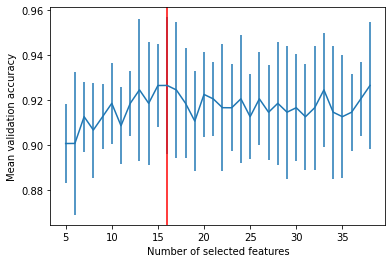

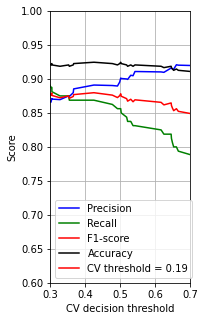

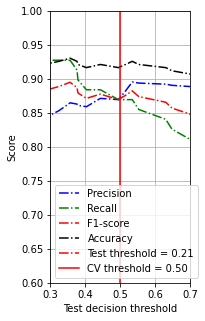

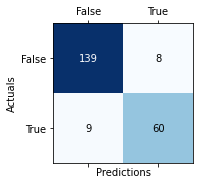

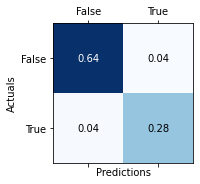

+-----------------------------------------------------------+
|        GradientBoostingClassifier with 16 features        |
+-------------------+----------+-----------+--------+-------+
|                   | Accuracy | Precision | Recall |   F1  |
+-------------------+----------+-----------+--------+-------+
| Validation (mean) |  92.46   |   90.13   | 85.62  | 87.82 |
|        Test       |  92.13   |   88.24   | 86.96  | 87.59 |
+-------------------+----------+-----------+--------+-------+


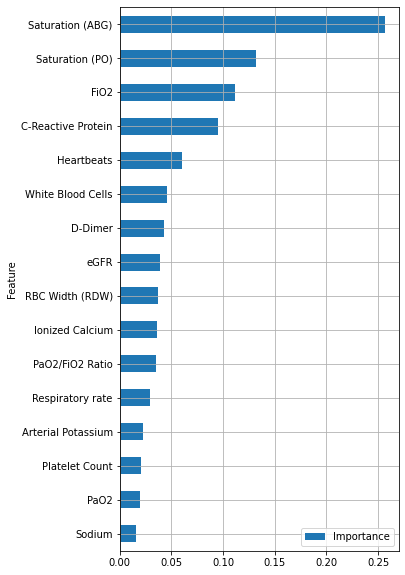

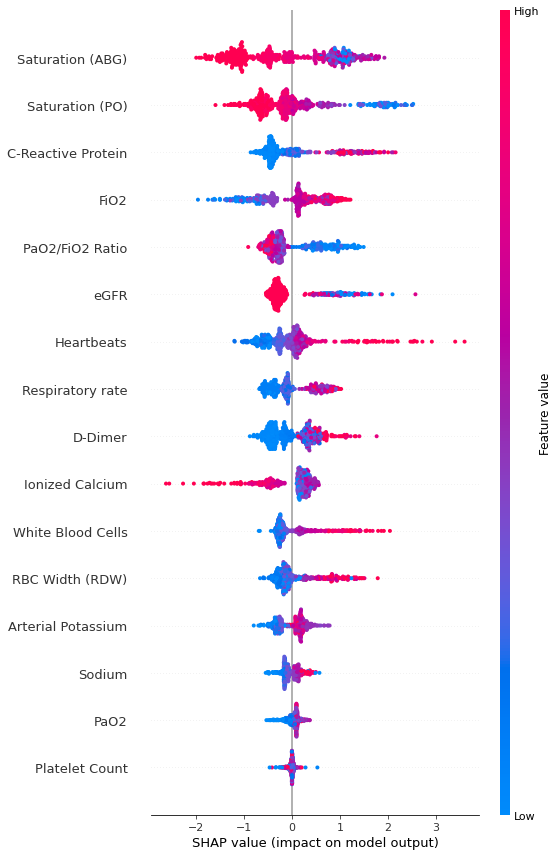

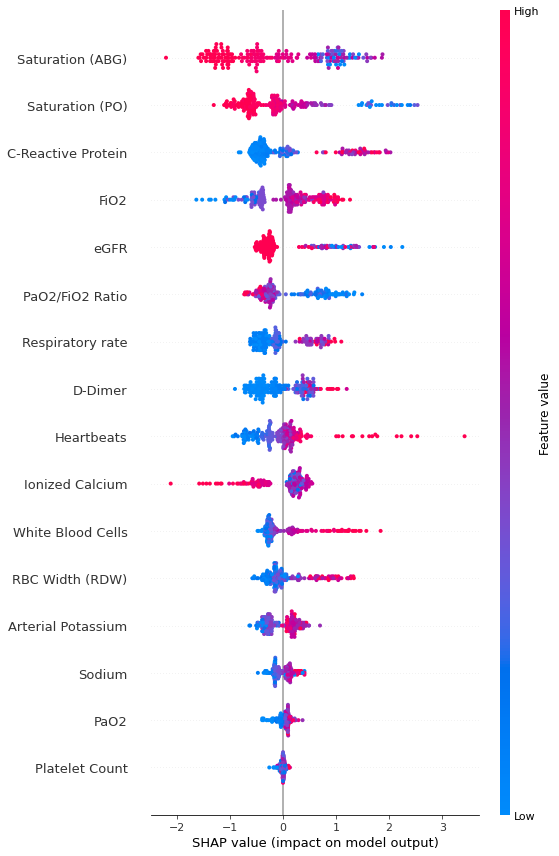

In [47]:
# XGBOOST RFECV
#####

from collections import OrderedDict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV


fit_and_save = False
model_name = "models_vimercate/XGBoostRFECV"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

features_train_local, features_test_local = features_train, features_test

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'n_estimators': 100,
}

# MODEL
min_features_to_select = 5
model = RFECV(
	estimator=GradientBoostingClassifier(random_state=seed, **param_grid),
	cv=skf,
	scoring='accuracy',
	step=1,
	n_jobs=-1,
	verbose=0,
	min_features_to_select=min_features_to_select
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train_local, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# BEST FEATURES
if hasattr(model, 'n_features_') and hasattr(model, 'ranking_') and hasattr(model, 'feature_names_in_'):
	# Print table
	ranking = dict(zip(model.feature_names_in_, model.ranking_))
	ranking = OrderedDict(sorted(ranking.items(), key=lambda x: x[1]))
	table = PrettyTable(title=str(model.estimator_.__class__.__name__) + ' with ' + str(model.n_features_) + " features", field_names=["Feature", "Ranking"])
	to_drop = []
	for (key, val) in zip(list(ranking.keys()), list(ranking.values())):
		table.add_row([key, val])
		if val != 1:
			to_drop.append(key)
	print(table)
	# Delete features from train and test
	features_train_local = drop_features(features_train_local, columns=to_drop, silent=True)
	features_test_local = drop_features(features_test_local, columns=to_drop, silent=True)
	
# PLOT
if hasattr(model, 'cv_results_') and hasattr(model, 'n_features_'):
	n_scores = len(model.cv_results_["mean_test_score"])
	plt.figure()
	plt.xlabel("Number of selected features")
	plt.ylabel("Mean validation accuracy")
	plt.errorbar(
		range(min_features_to_select, n_scores + min_features_to_select),
		model.cv_results_["mean_test_score"],
		yerr=model.cv_results_["std_test_score"],
	)
	plt.axvline(x = model.n_features_, color = 'r', label = "Number of selected features: %0.0f" % model.n_features_)
	plt.show()

# BEST MODEL
if hasattr(model, 'estimator_'):
	model = model.estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train_local, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = 0.5

# PREDICT TRAIN
#for i in np.arange(0.4, 0.6, 0.01):
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)

report_train = report

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test_local)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test_local)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train_local.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
#table.add_row(["Validation (std.dev)",	validation_scores['accuracy']['std_dev']*100, validation_scores['precision']['std_dev']*100, validation_scores['recall']['std_dev']*100, validation_scores['f1']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
coefficients = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features_train_local.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

# SHAP TRAIN
feature_importances_shap = calcola_shap(model, features_train_local, labels_train, plot=True)
feature_importances_shap2 = calcola_shap(model, features_test_local, labels_test, plot=True)
#print(feature_importances_shap)


In [ ]:
# XGBOOST RFE
#####
"""
fit_and_save = False
model_name = "models_vimercate/XGBoostRFE"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# FEATURE ELIMINATION
results = []
accuracies_Q2 = []
features_train_local, features_test_local = features_train, features_test
for j in tqdm_notebook(range(features_train_local.shape[1])):

	if features_train_local.shape[1] == 0:
		break

	# STRATIFIED KFOLD
	skf = StratifiedKFold(
		n_splits=5,
		shuffle=True,
		random_state=seed,
	)

	# PARAMS
	param_grid = {
		'max_depth': [3, 5, 7],
		'learning_rate': [0.1, 0.01, 0.001],
		'subsample': [0.7, 1],
		'n_estimators': [50, 100],
	}

	# MODEL SCORES
	scorers = {
		'precision_score': make_scorer(precision_score),
		'recall_score': make_scorer(recall_score),
		'accuracy_score': make_scorer(accuracy_score),
		'f1_score': make_scorer(f1_score),
		'roc_auc_score': make_scorer(roc_auc_score),
	}

	# MODEL
	model = RandomizedSearchCV(
		estimator=GradientBoostingClassifier(random_state=seed),
		param_distributions=param_grid,
		cv=skf,
		scoring=scorers,
		refit='f1_score',
		n_iter=10,
		n_jobs=-1,
		verbose=0,
		return_train_score=False,
		random_state=seed
	)

	# SAVE OR RESTORE THE MODEL
	if fit_and_save:
		model.fit(features_train_local, labels_train)
		dump(model, model_name + "/model" + str(j) + ".joblib", compress=9)
	else:
		model = load(model_name + "/model" + str(j) + ".joblib")

	# GET CROSS VALIDATION SCORES
	validation_scores = {}
	if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
		cv_results = model.cv_results_
		best_index = model.best_index_
		for scorer in scorers.keys():
			validation_scores[scorer] = {
				'mean': cv_results['mean_test_' + scorer][best_index],
				'std_dev': cv_results['std_test_' + scorer][best_index]
			}

	# BEST MODEL
	if hasattr(model, 'best_estimator_'):
		model = model.best_estimator_

	# CROSS-VALIDATION RESULTS
	predict_proba_cross_val = cross_val_predict(model, features_train_local, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

	# THRESHOLD FINETUNING
	accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
	max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
	threshold = max_f1_thresh

	# PREDICT TRAIN
	labels_pred = (predict_proba_cross_val >= threshold).astype(float)
	#labels_pred = model.predict(features_train_local)
	report = classification_report(labels_train, labels_pred, output_dict=True)
	confusion = confusion_matrix(labels_train, labels_pred)

	report_train = report

	# PREDICT TEST
	labels_pred = (model.predict_proba(features_test_local)[:,1] >= threshold).astype(float)
	#labels_pred = model.predict(features_test_local)
	report = classification_report(labels_test, labels_pred, output_dict=True)
	confusion = confusion_matrix(labels_test, labels_pred)

	# IMPORTANCES
	coefficients = model.feature_importances_
	feature_importances = pd.DataFrame({'Feature': features_train_local.columns, 'Importance': coefficients})
	#feature_importance = feature_importance.sort_values('Importance', ascending=True)
	#feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
	#plt. grid(True)
	#plt.show()

	# SHAP TRAIN
	#feature_importances_shap = calcola_shap(model, features_train_local, labels_train)

	# DROP COLONNE CON POCA IMPORTANZA
	to_drop = []
	for i, (feature, importance) in enumerate(zip(feature_importances['Feature'], feature_importances['Importance'])):
		if importance <= min(feature_importances['Importance']):
			# SAVE RESULTS
			results.append({'train': report_train, 'test': report, 'features': features_train_local.shape[1]-len(to_drop), 'importances': feature_importances, 'thresholds': threshold, 'confusions': confusion})
			# DROP
			to_drop.append(feature)
			break
	features_train_local = drop_features(features_train_local, columns=to_drop, silent=True)
	features_test_local = drop_features(features_test_local, columns=to_drop, silent=True)

# PLOT RFE'S RESULTS
train_accuracy = [result['train']['accuracy'] for i, result in enumerate(results)]
test_accuracy = [result['test']['accuracy'] for i, result in enumerate(results)]
train_F1 = [result['train']['0']['f1-score'] for i, result in enumerate(results)]
test_F1 = [result['test']['0']['f1-score'] for i, result in enumerate(results)]
n_features = [result['features'] for i, result in enumerate(results)]
thresholds = [result['thresholds'] for i, result in enumerate(results)]
confusions = [result['confusions'] for i, result in enumerate(results)]

# APPROXIMATION
approximation_grade = 2
train_accuracy_approx_params = np.polyfit(n_features, train_accuracy, approximation_grade)
train_accuracy_approx = np.poly1d(train_accuracy_approx_params)

# CALCULATE BEST INDEX
first_acceptable_value_index = np.argmax(train_accuracy_approx(n_features))

# PLOT
plt.plot(n_features, train_accuracy, label="Validation accuracy = %0.3f" % train_accuracy[first_acceptable_value_index], color="blue")
#plt.plot(n_features, train_F1, label="Validation F1 = %0.3f" % train_F1[first_acceptable_value_index], color="blue", linestyle="dotted")
plt.plot(n_features, train_accuracy_approx(n_features), label="Validation accuracy approximation (%0.0f degrees)" % approximation_grade, color="blue", linestyle="dashed")
plt.plot(n_features, test_accuracy, label="Test accuracy = %0.3f" % test_accuracy[first_acceptable_value_index], color="orange")
#plt.plot(n_features, test_F1, label="Test F1 = %0.3f" % test_F1[first_acceptable_value_index], color="orange", linestyle="dotted")
plt.xlabel('Number of features used')
plt.ylabel('Scores')
plt.axvline(x = n_features[first_acceptable_value_index], color = 'r', label = "Number of selected features: %0.0f" % n_features[first_acceptable_value_index])
plt.ylim(0.8, 0.95)
plt.xlim(max(n_features), min(n_features))
plt.legend(loc='lower left')
plt.grid(True); plt.show()

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusions[first_acceptable_value_index])

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(n_features[first_acceptable_value_index]) + " features (threshold: %0.2f)" % thresholds[first_acceptable_value_index],
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row([
	"Validation", results[first_acceptable_value_index]['train']['accuracy']*100, results[first_acceptable_value_index]['train']['1']['precision']*100,
	results[first_acceptable_value_index]['train']['1']['recall']*100,	results[first_acceptable_value_index]['train']['1']['f1-score']*100
])
table.add_row([
	"Test", results[first_acceptable_value_index]['test']['accuracy']*100, results[first_acceptable_value_index]['test']['1']['precision']*100,
	results[first_acceptable_value_index]['test']['1']['recall']*100, results[first_acceptable_value_index]['test']['1']['f1-score']*100
	])
print(table)

# PLOT FEATURE IMPORTANCES
results[first_acceptable_value_index]['importances'].sort_values('Importance', ascending=True).plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()
"""

+----------------------------------+
|           Best params            |
+-------------+--------+-------+---+
| probability | kernel | gamma | C |
+-------------+--------+-------+---+
|     True    | linear |   1   | 1 |
+-------------+--------+-------+---+


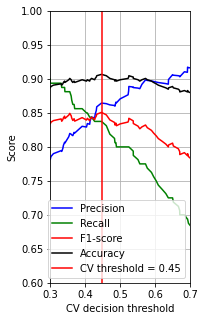

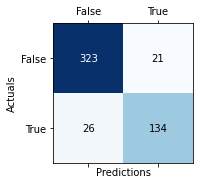

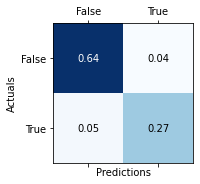

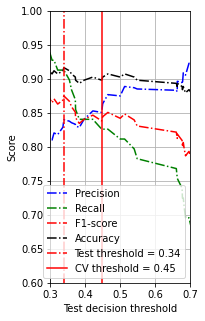

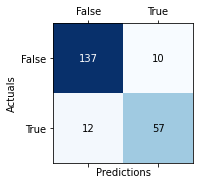

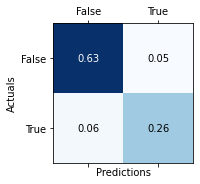

+--------------------------------------------------------------+
|                     SVC with 38 features                     |
+----------------------+----------+-----------+--------+-------+
|                      | Accuracy | Precision | Recall |   F1  |
+----------------------+----------+-----------+--------+-------+
|  Validation (mean)   |  90.67   |   86.45   | 83.75  | 85.08 |
| Validation (std.dev) |   3.21   |    4.11   |  7.55  |  5.72 |
|         Test         |  89.81   |   85.07   | 82.61  | 83.82 |
+----------------------+----------+-----------+--------+-------+


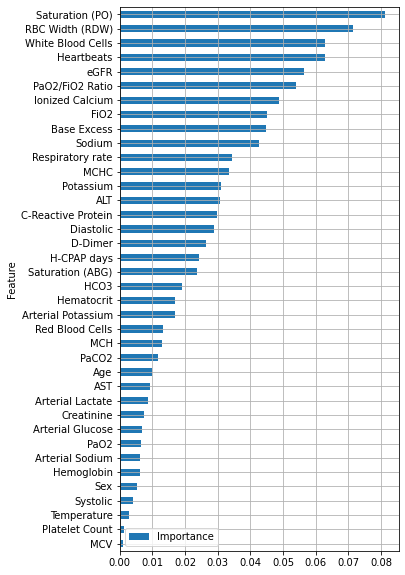

In [22]:
# SVM
#####

from sklearn.svm import SVC


fit_and_save = False
model_name = "models_vimercate/SVM"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'C': [0.1, 1, 10, 100, 1000],
	'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
	'kernel': ['linear'],#['rbf', 'linear'],
	'probability': [True]
}

# MODEL SCORES
scorers = {
	'precision_score': make_scorer(precision_score),
	'recall_score': make_scorer(recall_score),
	'accuracy_score': make_scorer(accuracy_score),
	'f1_score': make_scorer(f1_score),
	'roc_auc_score': make_scorer(roc_auc_score),
}

# MODEL
model = RandomizedSearchCV(
	estimator=SVC(random_state=seed),
	param_distributions=param_grid,
	cv=skf,
	scoring=scorers,
	refit='f1_score',
	n_iter=10,
	n_jobs=-1,
	verbose=1,
	return_train_score=False,
	random_state=seed
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# GET CROSS VALIDATION SCORES
validation_scores = {}
if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
	cv_results = model.cv_results_
	best_index = model.best_index_
	for scorer in scorers.keys():
		validation_scores[scorer] = {
			'mean': cv_results['mean_test_' + scorer][best_index],
			'std_dev': cv_results['std_test_' + scorer][best_index]
		}

# BEST PARAMS
if hasattr(model, 'best_params_'):
	table = PrettyTable(title="Best params", field_names=list(model.best_params_.keys()))
	table.add_row(list(model.best_params_.values()))
	print(table)

# BEST MODEL
if hasattr(model, 'best_estimator_'):
	model = model.best_estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = max_f1_thresh

# PREDICT TRAIN
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_train, labels_pred)

report_train = report

# PLOT TRAIN CONFUSION MATRIX
plot_confusion_matrix(confusion)

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
table.add_row(["Validation (std.dev)",	validation_scores['accuracy_score']['std_dev']*100, validation_scores['precision_score']['std_dev']*100, validation_scores['recall_score']['std_dev']*100, validation_scores['f1_score']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
avg_importance = [float(i)/sum(avg_importance) for i in avg_importance]
feature_importance = pd.DataFrame({'Feature': features_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

# SHAP TRAIN
#feature_importances_shap = calcola_shap(model, features_train, labels_train, tree=False, fit_and_save=False, model_name=model_name, plot=True)
#print(feature_importances_shap)


+------------------------------+
|     SVC with 34 features     |
+--------------------+---------+
|      Feature       | Ranking |
+--------------------+---------+
|        Sex         |    1    |
|        Age         |    1    |
|    H-CPAP days     |    1    |
|     Potassium      |    1    |
|       Sodium       |    1    |
|     Creatinine     |    1    |
|        eGFR        |    1    |
|        MCHC        |    1    |
|  Red Blood Cells   |    1    |
|     Hematocrit     |    1    |
|        MCH         |    1    |
| White Blood Cells  |    1    |
|     Hemoglobin     |    1    |
| C-Reactive Protein |    1    |
|  RBC Width (RDW)   |    1    |
|        ALT         |    1    |
|        AST         |    1    |
|      D-Dimer       |    1    |
|        PaO2        |    1    |
|  Arterial Glucose  |    1    |
| Arterial Potassium |    1    |
|       PaCO2        |    1    |
|  Arterial Sodium   |    1    |
|  Saturation (ABG)  |    1    |
|    Base Excess     |    1    |
|        H

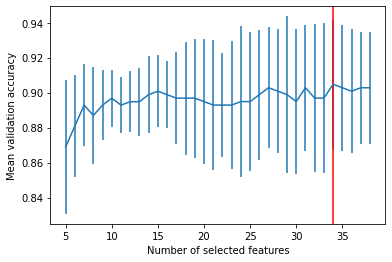

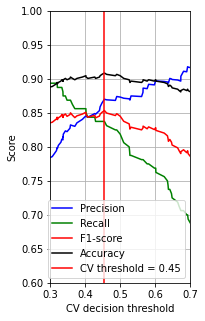

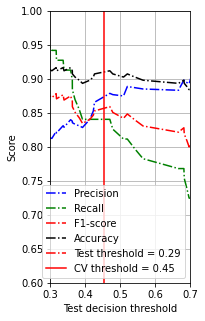

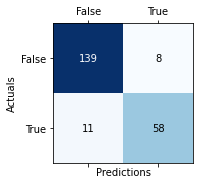

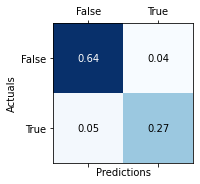

+-----------------------------------------------------------+
|                    SVC with 34 features                   |
+-------------------+----------+-----------+--------+-------+
|                   | Accuracy | Precision | Recall |   F1  |
+-------------------+----------+-----------+--------+-------+
| Validation (mean) |  90.87   |   87.01   | 83.75  | 85.35 |
|        Test       |  91.20   |   87.88   | 84.06  | 85.93 |
+-------------------+----------+-----------+--------+-------+


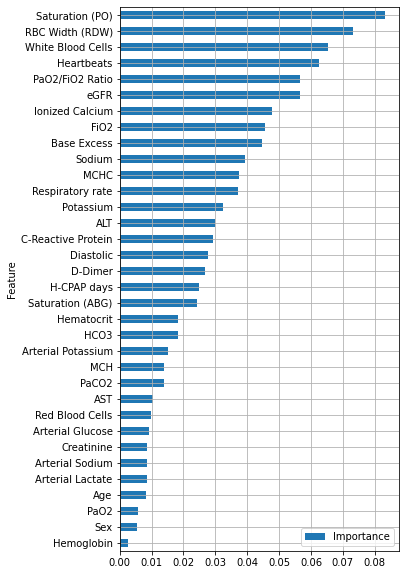

In [23]:
# SVM RFECV
#####

from collections import OrderedDict
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV


fit_and_save = False
model_name = "models_vimercate/SVMRFECV"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

features_train_local, features_test_local = features_train, features_test

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'probability': True,
    'kernel': 'linear',
    'gamma': 1,
    'C': 1,
}

# MODEL
min_features_to_select = 5
model = RFECV(
	estimator=SVC(random_state=seed, **param_grid),
	cv=skf,
	scoring='accuracy',
	step=1,
	n_jobs=-1,
	verbose=0,
	min_features_to_select=min_features_to_select
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train_local, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# BEST FEATURES
if hasattr(model, 'n_features_') and hasattr(model, 'ranking_') and hasattr(model, 'feature_names_in_'):
	# Print table
	ranking = dict(zip(model.feature_names_in_, model.ranking_))
	ranking = OrderedDict(sorted(ranking.items(), key=lambda x: x[1]))
	table = PrettyTable(title=str(model.estimator_.__class__.__name__) + ' with ' + str(model.n_features_) + " features", field_names=["Feature", "Ranking"])
	to_drop = []
	for (key, val) in zip(list(ranking.keys()), list(ranking.values())):
		table.add_row([key, val])
		if val != 1:
			to_drop.append(key)
	print(table)
	# Delete features from train and test
	features_train_local = drop_features(features_train_local, columns=to_drop, silent=True)
	features_test_local = drop_features(features_test_local, columns=to_drop, silent=True)
	
# PLOT
if hasattr(model, 'cv_results_') and hasattr(model, 'n_features_'):
	n_scores = len(model.cv_results_["mean_test_score"])
	plt.figure()
	plt.xlabel("Number of selected features")
	plt.ylabel("Mean validation accuracy")
	plt.errorbar(
		range(min_features_to_select, n_scores + min_features_to_select),
		model.cv_results_["mean_test_score"],
		yerr=model.cv_results_["std_test_score"],
	)
	plt.axvline(x = model.n_features_, color = 'r', label = "Number of selected features: %0.0f" % model.n_features_)
	plt.show()

# BEST MODEL
if hasattr(model, 'estimator_'):
	model = model.estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train_local, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = max_f1_thresh

# PREDICT TRAIN
#for i in np.arange(0.4, 0.6, 0.01):
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)

report_train = report

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test_local)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test_local)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train_local.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
#table.add_row(["Validation (std.dev)",	validation_scores['accuracy']['std_dev']*100, validation_scores['precision']['std_dev']*100, validation_scores['recall']['std_dev']*100, validation_scores['f1']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
avg_importance = [float(i)/sum(avg_importance) for i in avg_importance]
feature_importance = pd.DataFrame({'Feature': features_train_local.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()


In [ ]:
# SVM RFE
#####
"""
fit_and_save = False
model_name = "models_vimercate/SVMRFE"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# FEATURE ELIMINATION
results = []
accuracies_Q2 = []
features_train_local, features_test_local = features_train, features_test
for j in tqdm_notebook(range(features_train_local.shape[1])):

	if features_train_local.shape[1] == 0:
		break

	# STRATIFIED KFOLD
	skf = StratifiedKFold(
		n_splits=5,
		shuffle=True,
		random_state=seed,
	)

	# PARAMS
	param_grid = {
		'C': [0.1, 1, 10, 100, 1000],
		'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
		'kernel': ['linear'],#['rbf', 'linear'],
		'probability': [True]
	}

	# MODEL SCORES
	scorers = {
		'precision_score': make_scorer(precision_score),
		'recall_score': make_scorer(recall_score),
		'accuracy_score': make_scorer(accuracy_score),
		'f1_score': make_scorer(f1_score),
		'roc_auc_score': make_scorer(roc_auc_score),
	}

	# MODEL
	model = RandomizedSearchCV(
		estimator=SVC(random_state=seed),
		param_distributions=param_grid,
		cv=skf,
		scoring=scorers,
		refit='f1_score',
		n_iter=10,
		n_jobs=-1,
		verbose=0,
		return_train_score=False,
		random_state=seed
	)

	# SAVE OR RESTORE THE MODEL
	if fit_and_save:
		model.fit(features_train_local, labels_train)
		dump(model, model_name + "/model" + str(j) + ".joblib", compress=9)
	else:
		model = load(model_name + "/model" + str(j) + ".joblib")

	# GET CROSS VALIDATION SCORES
	validation_scores = {}
	if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
		cv_results = model.cv_results_
		best_index = model.best_index_
		for scorer in scorers.keys():
			validation_scores[scorer] = {
				'mean': cv_results['mean_test_' + scorer][best_index],
				'std_dev': cv_results['std_test_' + scorer][best_index]
			}

	# BEST MODEL
	if hasattr(model, 'best_estimator_'):
		model = model.best_estimator_

	# CROSS-VALIDATION RESULTS
	predict_proba_cross_val = cross_val_predict(model, features_train_local, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

	# THRESHOLD FINETUNING
	accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
	max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
	threshold = max_f1_thresh

	# PREDICT TRAIN
	labels_pred = (predict_proba_cross_val >= threshold).astype(float)
	#labels_pred = model.predict(features_train_local)
	report = classification_report(labels_train, labels_pred, output_dict=True)
	confusion = confusion_matrix(labels_train, labels_pred)

	report_train = report

	# PREDICT TEST
	labels_pred = (model.predict_proba(features_test_local)[:,1] >= threshold).astype(float)
	#labels_pred = model.predict(features_test_local)
	report = classification_report(labels_test, labels_pred, output_dict=True)
	confusion = confusion_matrix(labels_test, labels_pred)

	# IMPORTANCES
	coefficients = model.coef_
	avg_importance = np.mean(np.abs(coefficients), axis=0)
	feature_importances = pd.DataFrame({'Feature': features_train_local.columns, 'Importance': avg_importance})

	# DROP COLONNE CON POCA IMPORTANZA
	to_drop = []
	for i, (feature, importance) in enumerate(zip(feature_importances['Feature'], feature_importances['Importance'])):
		if importance <= min(feature_importances['Importance']):
			# SAVE RESULTS
			results.append({'train': report_train, 'test': report, 'features': features_train_local.shape[1]-len(to_drop), 'importances': feature_importances, 'thresholds': threshold, 'confusions': confusion})
			# DROP
			to_drop.append(feature)
			break
	features_train_local = drop_features(features_train_local, columns=to_drop, silent=True)
	features_test_local = drop_features(features_test_local, columns=to_drop, silent=True)

# PLOT RFE'S RESULTS
train_accuracy = [result['train']['accuracy'] for i, result in enumerate(results)]
test_accuracy = [result['test']['accuracy'] for i, result in enumerate(results)]
train_F1 = [result['train']['0']['f1-score'] for i, result in enumerate(results)]
test_F1 = [result['test']['0']['f1-score'] for i, result in enumerate(results)]
n_features = [result['features'] for i, result in enumerate(results)]
thresholds = [result['thresholds'] for i, result in enumerate(results)]
confusions = [result['confusions'] for i, result in enumerate(results)]

# APPROXIMATION
approximation_grade = 2
train_accuracy_approx_params = np.polyfit(n_features, train_accuracy, approximation_grade)
train_accuracy_approx = np.poly1d(train_accuracy_approx_params)

# CALCULATE BEST INDEX
first_acceptable_value_index = np.argmax(train_accuracy_approx(n_features))

# PLOT
plt.plot(n_features, train_accuracy, label="Validation accuracy = %0.3f" % train_accuracy[first_acceptable_value_index], color="blue")
#plt.plot(n_features, train_F1, label="Validation F1 = %0.3f" % train_F1[first_acceptable_value_index], color="blue", linestyle="dotted")
plt.plot(n_features, train_accuracy_approx(n_features), label="Validation accuracy approximation (%0.0f degrees)" % approximation_grade, color="blue", linestyle="dashed")
plt.plot(n_features, test_accuracy, label="Test accuracy = %0.3f" % test_accuracy[first_acceptable_value_index], color="orange")
#plt.plot(n_features, test_F1, label="Test F1 = %0.3f" % test_F1[first_acceptable_value_index], color="orange", linestyle="dotted")
plt.xlabel('Number of features used')
plt.ylabel('Scores')
plt.axvline(x = n_features[first_acceptable_value_index], color = 'r', label = "Number of selected features: %0.0f" % n_features[first_acceptable_value_index])
plt.ylim(0.8, 0.95)
plt.xlim(max(n_features), min(n_features))
plt.legend(loc='lower left')
plt.grid(True); plt.show()

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusions[first_acceptable_value_index])

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(n_features[first_acceptable_value_index]) + " features (threshold: %0.2f)" % thresholds[first_acceptable_value_index],
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row([
	"Validation", results[first_acceptable_value_index]['train']['accuracy']*100, results[first_acceptable_value_index]['train']['1']['precision']*100,
	results[first_acceptable_value_index]['train']['1']['recall']*100,	results[first_acceptable_value_index]['train']['1']['f1-score']*100
])
table.add_row([
	"Test", results[first_acceptable_value_index]['test']['accuracy']*100, results[first_acceptable_value_index]['test']['1']['precision']*100,
	results[first_acceptable_value_index]['test']['1']['recall']*100, results[first_acceptable_value_index]['test']['1']['f1-score']*100
	])
print(table)

# PLOT FEATURE IMPORTANCES
results[first_acceptable_value_index]['importances'].sort_values('Importance', ascending=True).plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()
"""

+----------------------+
|     Best params      |
+--------+---------+---+
| solver | penalty | C |
+--------+---------+---+
|  saga  |    l1   | 1 |
+--------+---------+---+


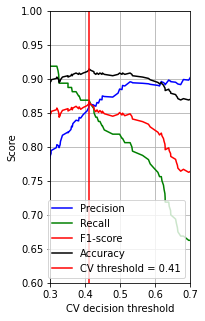

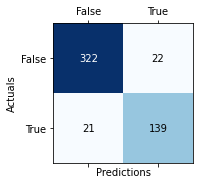

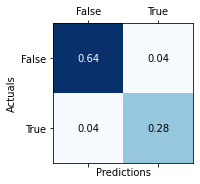

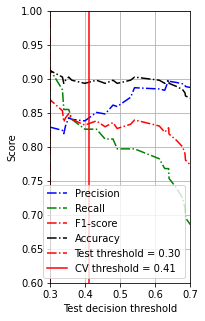

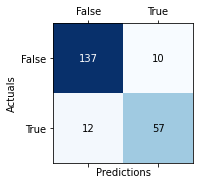

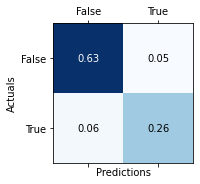

+--------------------------------------------------------------+
|             LogisticRegression with 38 features              |
+----------------------+----------+-----------+--------+-------+
|                      | Accuracy | Precision | Recall |   F1  |
+----------------------+----------+-----------+--------+-------+
|  Validation (mean)   |  91.47   |   86.34   | 86.88  | 86.60 |
| Validation (std.dev) |   2.22   |    4.34   |  4.84  |  3.87 |
|         Test         |  89.81   |   85.07   | 82.61  | 83.82 |
+----------------------+----------+-----------+--------+-------+


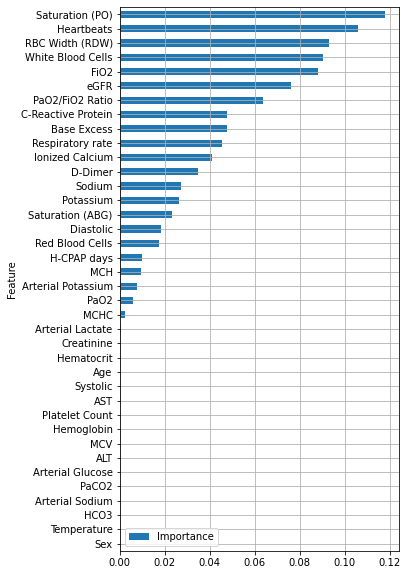

In [52]:
# LOGISTIC REGRESSION + LASSO
#####

from sklearn.linear_model import LogisticRegression


fit_and_save = False
model_name = "models_vimercate/LogisticRegressionLASSO"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'C': [0.01, 0.1, 1, 10],
	'penalty': ['l1'],
	'solver': ['saga'],
}

# MODEL SCORES
scorers = {
	'precision_score': make_scorer(precision_score),
	'recall_score': make_scorer(recall_score),
	'accuracy_score': make_scorer(accuracy_score),
	'f1_score': make_scorer(f1_score),
	'roc_auc_score': make_scorer(roc_auc_score),
}

# MODEL
model = RandomizedSearchCV(
	estimator=LogisticRegression(random_state=seed),
	param_distributions=param_grid,
	cv=skf,
	scoring=scorers,
	refit='f1_score',
	n_iter=10,
	n_jobs=-1,
	verbose=1,
	return_train_score=False,
	random_state=seed
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# GET CROSS VALIDATION SCORES
validation_scores = {}
if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
	cv_results = model.cv_results_
	best_index = model.best_index_
	for scorer in scorers.keys():
		validation_scores[scorer] = {
			'mean': cv_results['mean_test_' + scorer][best_index],
			'std_dev': cv_results['std_test_' + scorer][best_index]
		}

# BEST PARAMS
if hasattr(model, 'best_params_'):
	table = PrettyTable(title="Best params", field_names=list(model.best_params_.keys()))
	table.add_row(list(model.best_params_.values()))
	print(table)

# BEST MODEL
if hasattr(model, 'best_estimator_'):
	model = model.best_estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = max_f1_thresh

# PREDICT TRAIN
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_train, labels_pred)

report_train = report

# PLOT TRAIN CONFUSION MATRIX
plot_confusion_matrix(confusion)

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
table.add_row(["Validation (std.dev)",	validation_scores['accuracy_score']['std_dev']*100, validation_scores['precision_score']['std_dev']*100, validation_scores['recall_score']['std_dev']*100, validation_scores['f1_score']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
avg_importance = [float(i)/sum(avg_importance) for i in avg_importance]
feature_importance = pd.DataFrame({'Feature': features_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

# SHAP TRAIN
#feature_importances_shap = calcola_shap(model, features_train, labels_train, tree=False, fit_and_save=False, model_name=model_name, plot=True)
#print(feature_importances_shap)


+-------------------------------------+
| LogisticRegression with 18 features |
+-------------------------+-----------+
|         Feature         |  Ranking  |
+-------------------------+-----------+
|        Potassium        |     1     |
|          Sodium         |     1     |
|           eGFR          |     1     |
|     Red Blood Cells     |     1     |
|           MCH           |     1     |
|    White Blood Cells    |     1     |
|    C-Reactive Protein   |     1     |
|     RBC Width (RDW)     |     1     |
|         D-Dimer         |     1     |
|     Saturation (ABG)    |     1     |
|       Base Excess       |     1     |
|     Ionized Calcium     |     1     |
|           FiO2          |     1     |
|     PaO2/FiO2 Ratio     |     1     |
|     Respiratory rate    |     1     |
|        Heartbeats       |     1     |
|     Saturation (PO)     |     1     |
|        Diastolic        |     1     |
|       H-CPAP days       |     2     |
|    Arterial Potassium   |     3     |


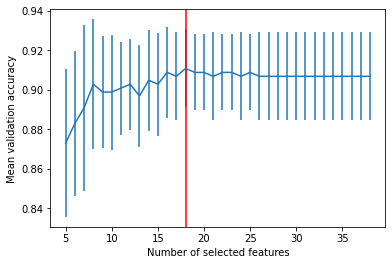

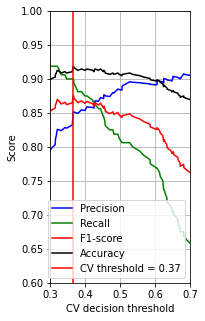

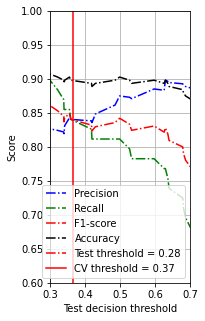

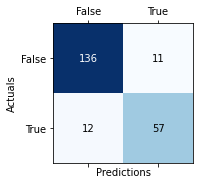

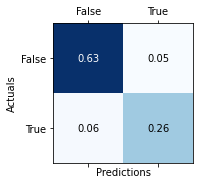

+-----------------------------------------------------------+
|            LogisticRegression with 18 features            |
+-------------------+----------+-----------+--------+-------+
|                   | Accuracy | Precision | Recall |   F1  |
+-------------------+----------+-----------+--------+-------+
| Validation (mean) |  91.87   |   85.21   | 90.00  | 87.54 |
|        Test       |  89.35   |   83.82   | 82.61  | 83.21 |
+-------------------+----------+-----------+--------+-------+


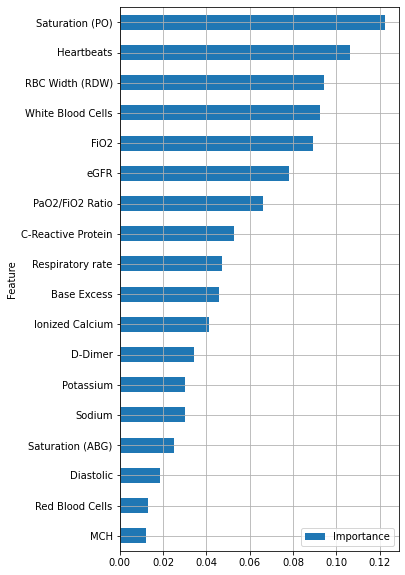

In [53]:
# LOGISTIC REGRESSION + LASSO RFECV
#####

from collections import OrderedDict
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV


fit_and_save = False
model_name = "models_vimercate/LogisticRegressionLASSORFECV"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

features_train_local, features_test_local = features_train, features_test

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'C': 1,
	'penalty': 'l1',
	'solver': 'saga',
}

# MODEL
min_features_to_select = 5
model = RFECV(
	estimator=LogisticRegression(random_state=seed, **param_grid),
	cv=skf,
	scoring='accuracy',
	step=1,
	n_jobs=-1,
	verbose=0,
	min_features_to_select=min_features_to_select
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train_local, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# BEST FEATURES
if hasattr(model, 'n_features_') and hasattr(model, 'ranking_') and hasattr(model, 'feature_names_in_'):
	# Print table
	ranking = dict(zip(model.feature_names_in_, model.ranking_))
	ranking = OrderedDict(sorted(ranking.items(), key=lambda x: x[1]))
	table = PrettyTable(title=str(model.estimator_.__class__.__name__) + ' with ' + str(model.n_features_) + " features", field_names=["Feature", "Ranking"])
	to_drop = []
	for (key, val) in zip(list(ranking.keys()), list(ranking.values())):
		table.add_row([key, val])
		if val != 1:
			to_drop.append(key)
	print(table)
	# Delete features from train and test
	features_train_local = drop_features(features_train_local, columns=to_drop, silent=True)
	features_test_local = drop_features(features_test_local, columns=to_drop, silent=True)
	
# PLOT
if hasattr(model, 'cv_results_') and hasattr(model, 'n_features_'):
	n_scores = len(model.cv_results_["mean_test_score"])
	plt.figure()
	plt.xlabel("Number of selected features")
	plt.ylabel("Mean validation accuracy")
	plt.errorbar(
		range(min_features_to_select, n_scores + min_features_to_select),
		model.cv_results_["mean_test_score"],
		yerr=model.cv_results_["std_test_score"],
	)
	plt.axvline(x = model.n_features_, color = 'r', label = "Number of selected features: %0.0f" % model.n_features_)
	plt.show()

# BEST MODEL
if hasattr(model, 'estimator_'):
	model = model.estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train_local, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = max_f1_thresh

# PREDICT TRAIN
#for i in np.arange(0.4, 0.6, 0.01):
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)

report_train = report

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test_local)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test_local)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train_local.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
#table.add_row(["Validation (std.dev)",	validation_scores['accuracy']['std_dev']*100, validation_scores['precision']['std_dev']*100, validation_scores['recall']['std_dev']*100, validation_scores['f1']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
avg_importance = [float(i)/sum(avg_importance) for i in avg_importance]
feature_importance = pd.DataFrame({'Feature': features_train_local.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()


In [ ]:
# LOGISTIC REGRESSION + LASSO RFE
#####
"""
from sklearn.linear_model import LogisticRegression


fit_and_save = True
model_name = "models_vimercate/LogisticRegressionLASSORFE"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# FEATURE ELIMINATION
results = []
features_train_local, features_test_local = features_train, features_test
for j in tqdm_notebook(range(features_train_local.shape[1])):

	if features_train_local.shape[1] == 0:
		break

	# STRATIFIED KFOLD
	skf = StratifiedKFold(
		n_splits=5,
		shuffle=True,
		random_state=seed,
	)

	# PARAMS
	param_grid = {
		'C': [1, 10],
		'penalty': ['l1'],
		'solver': ['saga'],
	}

	# MODEL SCORES
	scorers = {
		'precision_score': make_scorer(precision_score),
		'recall_score': make_scorer(recall_score),
		'accuracy_score': make_scorer(accuracy_score),
		'f1_score': make_scorer(f1_score),
		'roc_auc_score': make_scorer(roc_auc_score),
	}

	# MODEL
	model = RandomizedSearchCV(
		estimator=LogisticRegression(random_state=seed),
		param_distributions=param_grid,
		cv=skf,
		scoring=scorers,
		refit='f1_score',
		n_iter=10,
		n_jobs=-1,
		verbose=0,
		return_train_score=False,
		random_state=seed
	)

	# SAVE OR RESTORE THE MODEL
	if fit_and_save:
		model.fit(features_train_local, labels_train)
		dump(model, model_name + "/model" + str(j) + ".joblib", compress=9)
	else:
		model = load(model_name + "/model" + str(j) + ".joblib")

	# GET CROSS VALIDATION SCORES
	validation_scores = {}
	if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
		cv_results = model.cv_results_
		best_index = model.best_index_
		for scorer in scorers.keys():
			validation_scores[scorer] = {
				'mean': cv_results['mean_test_' + scorer][best_index],
				'std_dev': cv_results['std_test_' + scorer][best_index]
			}

	# BEST MODEL
	if hasattr(model, 'best_estimator_'):
		model = model.best_estimator_

	# CROSS-VALIDATION RESULTS
	predict_proba_cross_val = cross_val_predict(model, features_train_local, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

	# THRESHOLD FINETUNING
	accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
	max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
	threshold = max_f1_thresh

	# PREDICT TRAIN
	labels_pred = (predict_proba_cross_val >= threshold).astype(float)
	#labels_pred = model.predict(features_train_local)
	report = classification_report(labels_train, labels_pred, output_dict=True)
	confusion = confusion_matrix(labels_train, labels_pred)

	report_train = report

	# PREDICT TEST
	labels_pred = (model.predict_proba(features_test_local)[:,1] >= threshold).astype(float)
	#labels_pred = model.predict(features_test_local)
	report = classification_report(labels_test, labels_pred, output_dict=True)
	confusion = confusion_matrix(labels_test, labels_pred)

	# IMPORTANCES
	coefficients = model.coef_
	avg_importance = np.mean(np.abs(coefficients), axis=0)
	avg_importance = [float(i)/sum(avg_importance) for i in avg_importance]
	feature_importances = pd.DataFrame({'Feature': features_train_local.columns, 'Importance': avg_importance})

	# DROP COLONNE CON POCA IMPORTANZA
	to_drop = []
	for i, (feature, importance) in enumerate(zip(feature_importances['Feature'], feature_importances['Importance'])):
		if importance <= min(feature_importances['Importance']):
			# SAVE RESULTS
			results.append({'train': report_train, 'test': report, 'features': features_train_local.shape[1]-len(to_drop), 'importances': feature_importances, 'thresholds': threshold, 'confusions': confusion})
			# DROP
			to_drop.append(feature)
			break
	features_train_local = drop_features(features_train_local, columns=to_drop, silent=True)
	features_test_local = drop_features(features_test_local, columns=to_drop, silent=True)

# PLOT RFE'S RESULTS
train_accuracy = [result['train']['accuracy']-i/10000 for i, result in enumerate(results)]
test_accuracy = [result['test']['accuracy'] for i, result in enumerate(results)]
train_F1 = [result['train']['0']['f1-score'] for i, result in enumerate(results)]
test_F1 = [result['test']['0']['f1-score'] for i, result in enumerate(results)]
n_features = [result['features'] for i, result in enumerate(results)]
thresholds = [result['thresholds'] for i, result in enumerate(results)]
confusions = [result['confusions'] for i, result in enumerate(results)]

# APPROXIMATION
approximation_grade = 2
train_accuracy_approx_params = [np.polyfit(n_features[i:], train_accuracy[i:], approximation_grade) for i, acc in enumerate(train_accuracy)]
train_accuracy_approx_functions = [np.poly1d(train_accuracy_approx_param) for i, train_accuracy_approx_param in enumerate(train_accuracy_approx_params)]

# CALCULATE BEST INDEX
train_accuracy_approx_functions_max = [np.max(train_accuracy_approx_function(n_features[i:])) for i, train_accuracy_approx_function in enumerate(train_accuracy_approx_functions)]
train_accuracy_approx_max_function_index = 0#np.argmax(train_accuracy_approx_functions_max)
train_accuracy_approx_max_function_best_index = np.argmax(train_accuracy_approx_functions[train_accuracy_approx_max_function_index](n_features[train_accuracy_approx_max_function_index:]))
train_accuracy_approx_max_best_index = train_accuracy_approx_max_function_index + train_accuracy_approx_max_function_best_index

# PLOT
for i, train_accuracy_approx_function in enumerate(train_accuracy_approx_functions):
	if i == 0:
		plt.plot(n_features[i:], train_accuracy_approx_function(n_features[i:]), color="red", linestyle="dashed")
plt.plot(n_features, train_accuracy, label="Validation accuracy = %0.3f" % train_accuracy[train_accuracy_approx_max_best_index], color="blue")
#plt.plot(n_features, train_F1, label="Validation F1 = %0.3f" % train_F1[first_acceptable_value_index], color="blue", linestyle="dotted")
plt.plot(n_features, test_accuracy, label="Test accuracy = %0.3f" % test_accuracy[train_accuracy_approx_max_best_index], color="orange")
#plt.plot(n_features, test_F1, label="Test F1 = %0.3f" % test_F1[first_acceptable_value_index], color="orange", linestyle="dotted")
plt.xlabel('Number of features used')
plt.ylabel('Scores')
plt.axvline(x = n_features[train_accuracy_approx_max_best_index], color = 'r', label = "Number of selected features: %0.0f" % n_features[train_accuracy_approx_max_best_index])
plt.ylim(0.8, 0.95)
plt.xlim(max(n_features)+0.5, min(n_features)-0.5)
plt.legend(loc='lower left')
plt.grid(True); plt.show()

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusions[train_accuracy_approx_max_best_index])

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' + LASSO with ' + str(n_features[train_accuracy_approx_max_best_index]) + " features (threshold: %0.2f)" % thresholds[train_accuracy_approx_max_best_index],
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row([
	"Validation", results[train_accuracy_approx_max_best_index]['train']['accuracy']*100, results[train_accuracy_approx_max_best_index]['train']['1']['precision']*100,
	results[train_accuracy_approx_max_best_index]['train']['1']['recall']*100,	results[train_accuracy_approx_max_best_index]['train']['1']['f1-score']*100
])
table.add_row([
	"Test", results[train_accuracy_approx_max_best_index]['test']['accuracy']*100, results[train_accuracy_approx_max_best_index]['test']['1']['precision']*100,
	results[train_accuracy_approx_max_best_index]['test']['1']['recall']*100, results[train_accuracy_approx_max_best_index]['test']['1']['f1-score']*100
	])
print(table)

# PLOT FEATURE IMPORTANCES
results[train_accuracy_approx_max_best_index]['importances'].sort_values('Importance', ascending=True).plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
plt.grid(True); plt.show()
"""

+-------------------------------------------------------------+
|                         Best params                         |
+--------+----------+--------------------+-------+------------+
| solver | max_iter | hidden_layer_sizes | alpha | activation |
+--------+----------+--------------------+-------+------------+
|  adam  |   200    |       (25,)        | 0.005 |    tanh    |
+--------+----------+--------------------+-------+------------+


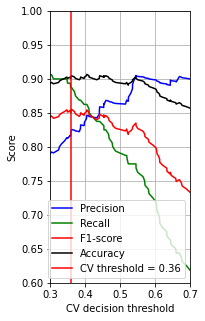

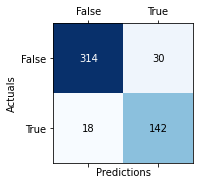

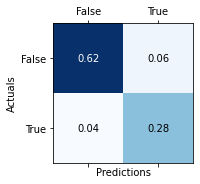

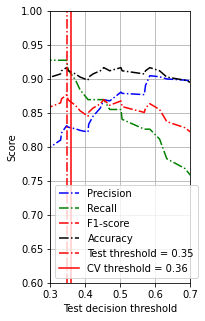

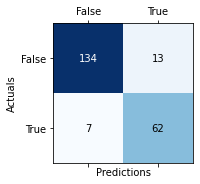

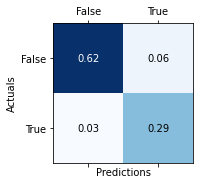

+--------------------------------------------------------------+
|                MLPClassifier with 38 features                |
+----------------------+----------+-----------+--------+-------+
|                      | Accuracy | Precision | Recall |   F1  |
+----------------------+----------+-----------+--------+-------+
|  Validation (mean)   |  90.48   |   82.56   | 88.75  | 85.54 |
| Validation (std.dev) |   1.00   |    3.49   |  1.25  |  1.18 |
|         Test         |  90.74   |   82.67   | 89.86  | 86.11 |
+----------------------+----------+-----------+--------+-------+


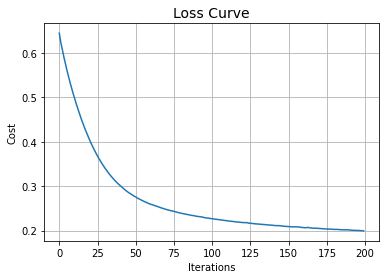

In [17]:
# MLP
#####

from sklearn.neural_network import MLPClassifier


fit_and_save = False
model_name = "models_vimercate/MLP"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'hidden_layer_sizes': [(10,), (25,), (50,)],
	'max_iter': [50, 100, 150, 200],
	'activation': ['tanh'],
	'solver': ['adam'],
	'alpha': [0.01, 0.005, 0.001],
}

# MODEL SCORES
scorers = {
	'precision_score': make_scorer(precision_score),
	'recall_score': make_scorer(recall_score),
	'accuracy_score': make_scorer(accuracy_score),
	'f1_score': make_scorer(f1_score),
	'roc_auc_score': make_scorer(roc_auc_score),
}

# MODEL
model = RandomizedSearchCV(
	estimator=MLPClassifier(random_state=seed),
	param_distributions=param_grid,
	cv=skf,
	scoring=scorers,
	refit='f1_score',
	n_iter=10,
	n_jobs=-1,
	verbose=1,
	return_train_score=False,
	random_state=seed
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# GET CROSS VALIDATION SCORES
validation_scores = {}
if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
	cv_results = model.cv_results_
	best_index = model.best_index_
	for scorer in scorers.keys():
		validation_scores[scorer] = {
			'mean': cv_results['mean_test_' + scorer][best_index],
			'std_dev': cv_results['std_test_' + scorer][best_index]
		}

# BEST PARAMS
if hasattr(model, 'best_params_'):
	table = PrettyTable(title="Best params", field_names=list(model.best_params_.keys()))
	table.add_row(list(model.best_params_.values()))
	print(table)

# BEST MODEL
if hasattr(model, 'best_estimator_'):
	model = model.best_estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train, labels_train, cv=skf, method='predict_proba', n_jobs=-1)[:,1]

# THRESHOLD FINETUNING
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, predict_proba_cross_val)
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
threshold = max_f1_thresh

# PREDICT TRAIN
labels_pred = (predict_proba_cross_val >= threshold).astype(float)
#labels_pred = model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_train, labels_pred)

report_train = report

# PLOT TRAIN CONFUSION MATRIX
plot_confusion_matrix(confusion)

# THRESHOLD FINETUNING (TEST)
accuracies, precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test)[:,1])
max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(accuracies, precisions, recalls, f1_scores, thresholds_pr)
plot_precision_recall_curve(accuracies, precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
labels_pred = (model.predict_proba(features_test)[:,1] >= threshold).astype(float)
#labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
table.add_row(["Validation (std.dev)",	validation_scores['accuracy_score']['std_dev']*100, validation_scores['precision_score']['std_dev']*100, validation_scores['recall_score']['std_dev']*100, validation_scores['f1_score']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

plt.plot(model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True); plt.show()

# IMPORTANCES
#coefficients = model.best_estimator_.coefs_
#avg_importance = np.mean(np.abs(coefficients), axis=0)
#feature_importance = pd.DataFrame({'Feature': features_train.columns, 'Importance': avg_importance})
#feature_importance = feature_importance.sort_values('Importance', ascending=True)
#feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
#plt.show()

# SHAP TRAIN
#feature_importances_shap = calcola_shap(model.best_estimator_, features_train, labels_train, tree=False, fit_and_save=False, model_name=model_name, plot=True)
#print(feature_importances_shap)


+----------------------------------------------------------+
|                       Best params                        |
+------------+----------+----------+--------------+--------+
|  penalty   | max_iter | l1_ratio | class_weight | alpha  |
+------------+----------+----------+--------------+--------+
| elasticnet |   2000   |   0.5    |   balanced   | 0.0001 |
+------------+----------+----------+--------------+--------+


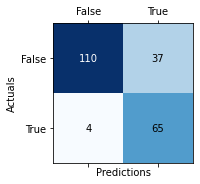

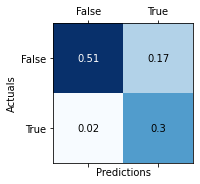

+--------------------------------------------------------------+
|                 Perceptron with 38 features                  |
+----------------------+----------+-----------+--------+-------+
|                      | Accuracy | Precision | Recall |   F1  |
+----------------------+----------+-----------+--------+-------+
|  Validation (mean)   |  89.09   |   82.21   | 83.75  | 82.97 |
| Validation (std.dev) |   2.66   |    5.93   |  7.76  |  4.61 |
|         Test         |  81.02   |   63.73   | 94.20  | 76.02 |
+----------------------+----------+-----------+--------+-------+


In [18]:
# PERCEPTRON
#####

from sklearn.linear_model import Perceptron


fit_and_save = False
model_name = "models_vimercate/Perceptron"
try:
	os.makedirs(model_name)
except OSError as error:
	pass

# STRATIFIED KFOLD
skf = StratifiedKFold(
	n_splits=5,
	shuffle=True,
	random_state=seed,
)

# PARAMS
param_grid = {
	'penalty': ["elasticnet"],
	'max_iter': [2000],
	'alpha': [0.0001],
	'class_weight': ["balanced"],
	'l1_ratio': [0.5]
}

# MODEL SCORES
scorers = {
	'precision_score': make_scorer(precision_score),
	'recall_score': make_scorer(recall_score),
	'accuracy_score': make_scorer(accuracy_score),
	'f1_score': make_scorer(f1_score),
	'roc_auc_score': make_scorer(roc_auc_score),
}

# MODEL
model = RandomizedSearchCV(
	estimator=Perceptron(random_state=seed),
	param_distributions=param_grid,
	cv=skf,
	scoring=scorers,
	refit='f1_score',
	n_iter=10,
	n_jobs=-1,
	verbose=1,
	return_train_score=False,
	random_state=seed
)

# SAVE OR RESTORE THE MODEL
if fit_and_save:
	model.fit(features_train, labels_train)
	dump(model, model_name + "/model.joblib", compress=9)
else:
	model = load(model_name + "/model.joblib")

# GET CROSS VALIDATION SCORES
validation_scores = {}
if hasattr(model, 'cv_results_') and hasattr(model, 'best_index_'):
	cv_results = model.cv_results_
	best_index = model.best_index_
	for scorer in scorers.keys():
		validation_scores[scorer] = {
			'mean': cv_results['mean_test_' + scorer][best_index],
			'std_dev': cv_results['std_test_' + scorer][best_index]
		}

# BEST PARAMS
if hasattr(model, 'best_params_') and not not(model.best_params_):
	table = PrettyTable(title="Best params", field_names=list(model.best_params_.keys()))
	table.add_row(list(model.best_params_.values()))
	print(table)

# BEST MODEL
if hasattr(model, 'best_estimator_'):
	model = model.best_estimator_

# CROSS-VALIDATION RESULTS
predict_proba_cross_val = cross_val_predict(model, features_train, labels_train, cv=skf, method='predict', n_jobs=-1)

# THRESHOLD FINETUNING
#precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_train, model.predict_proba(features_train)[:,1])
#max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(precisions, recalls, f1_scores, thresholds_pr)
#plot_precision_recall_curve(precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh)
#threshold = max_f1_thresh

# PREDICT TRAIN
#labels_pred = (model.predict_proba(features_train)[:,1] >= threshold).astype(float)
labels_pred = predict_proba_cross_val#model.predict(features_train)
report = classification_report(labels_train, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_train, labels_pred)

report_train = report

# THRESHOLD FINETUNING (TEST)
#precisions, recalls, f1_scores, thresholds_pr = calcola_precision_recall_curve(labels_test, model.predict_proba(features_test)[:,1])
#max_f1_score_index, max_f1_score, max_f1_thresh = calcola_precision_recall_curve_threshold(precisions, recalls, f1_scores, thresholds_pr)
#plot_precision_recall_curve(precisions, recalls, f1_scores, thresholds_pr, max_f1_score_index, max_f1_score, max_f1_thresh, threshold)

# PREDICT TEST
#labels_pred = (model.predict_proba(features_test)[:,1] >= threshold).astype(float)
labels_pred = model.predict(features_test)
report = classification_report(labels_test, labels_pred, output_dict=True)
confusion = confusion_matrix(labels_test, labels_pred)

# PLOT TEST CONFUSION MATRIX
plot_confusion_matrix(confusion)

# INFORMATIONS
table = PrettyTable(
	title = str(model.__class__.__name__) + ' with ' + str(features_train.shape[1]) + " features",
	field_names=[" ", "Accuracy", "Precision", "Recall", "F1"],
	float_format='.2'
)
table.add_row(["Validation (mean)",		report_train['accuracy']*100,	report_train['1']['precision']*100,	report_train['1']['recall']*100,	report_train['1']['f1-score']*100])
table.add_row(["Validation (std.dev)",	validation_scores['accuracy_score']['std_dev']*100, validation_scores['precision_score']['std_dev']*100, validation_scores['recall_score']['std_dev']*100, validation_scores['f1_score']['std_dev']*100])
table.add_row(["Test",					report['accuracy']*100,			report['1']['precision']*100,		report['1']['recall']*100,			report['1']['f1-score']*100])
print(table)

# IMPORTANCES
#coefficients = model.best_estimator_.coefs_
#avg_importance = np.mean(np.abs(coefficients), axis=0)
#feature_importance = pd.DataFrame({'Feature': features_train.columns, 'Importance': avg_importance})
#feature_importance = feature_importance.sort_values('Importance', ascending=True)
#feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 10))
#plt.show()

# SHAP TRAIN
#feature_importances_shap = calcola_shap(model.best_estimator_, features_train, labels_train, tree=False, fit_and_save=False, model_name=model_name, plot=True)
#print(feature_importances_shap)
